\# A Network of Thrones - Season 6

---



**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [1]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 15.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [4]:
relations_df = pd.read_csv(folder+"data/got-s8-edges.csv")
characters_df  = pd.read_csv(folder+"data/got-s8-nodes.csv")

In [5]:
# Delete self-loops - there are no self-loops in the data.

#self_loop = []
#for i in range(len(relations)):
#  if relations["Source"][i] == relations["Target"][i]:
#    self_loop.append(i)
#
#
#relations = relations.drop(set(self_loop)).reset_index()

In [6]:
import networkx as nx

# Check for duplicate Ids
duplicates = characters_df[characters_df.duplicated('Id', keep=False)]
if not duplicates.empty:
    print("Duplicate Ids found in characters_df:")
    print(duplicates)

# Remove duplicates based on Id (keeping the first occurrence)
characters_df = characters_df.drop_duplicates(subset='Id')

# Create the NetworkX graph from the edge list
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Convert characters DataFrame to dictionary and add nodes with attributes
characters = characters_df.set_index('Id').to_dict('index')

G.add_nodes_from(characters.items())
print(G.nodes(data=True))
print(G.edges(data=True))


[('DAENERYS', {'Label': 'Daenerys'}), ('JON', {'Label': 'Jon'}), ('TYRION', {'Label': 'Tyrion'}), ('JAIME', {'Label': 'Jaime'}), ('BRIENNE', {'Label': 'Brienne'}), ('VARYS', {'Label': 'Varys'}), ('SANSA', {'Label': 'Sansa'}), ('DAVOS', {'Label': 'Davos'}), ('ARYA', {'Label': 'Arya'}), ('GENDRY', {'Label': 'Gendry'}), ('SAM', {'Label': 'Sam'}), ('HOUND', {'Label': 'Sandor'}), ('BRAN', {'Label': 'Bran'}), ('JORAH', {'Label': 'Jorah'}), ('GREY_WORM', {'Label': 'Grey Worm'}), ('TORMUND', {'Label': 'Tormund'}), ('CERSEI', {'Label': 'Cersei'}), ('QYBURN', {'Label': 'Qyburn'}), ('BRONN', {'Label': 'Bronn'}), ('EURON', {'Label': 'Euron'}), ('BERIC', {'Label': 'Beric'}), ('PODRICK', {'Label': 'Podrick'}), ('THEON', {'Label': 'Theon'}), ('MISSANDEI', {'Label': 'Missandei'}), ('MOUNTAIN', {'Label': 'Gregor'}), ('NORA', {'Label': 'Nora'}), ('VICKY', {'Label': 'Vicky'}), ('NIGHT_KING', {'Label': 'Night King'}), ('LYANNA_MORMONT', {'Label': 'Lyanna Mormont'}), ('EDDISON_TOLLETT', {'Label': 'Eddison'

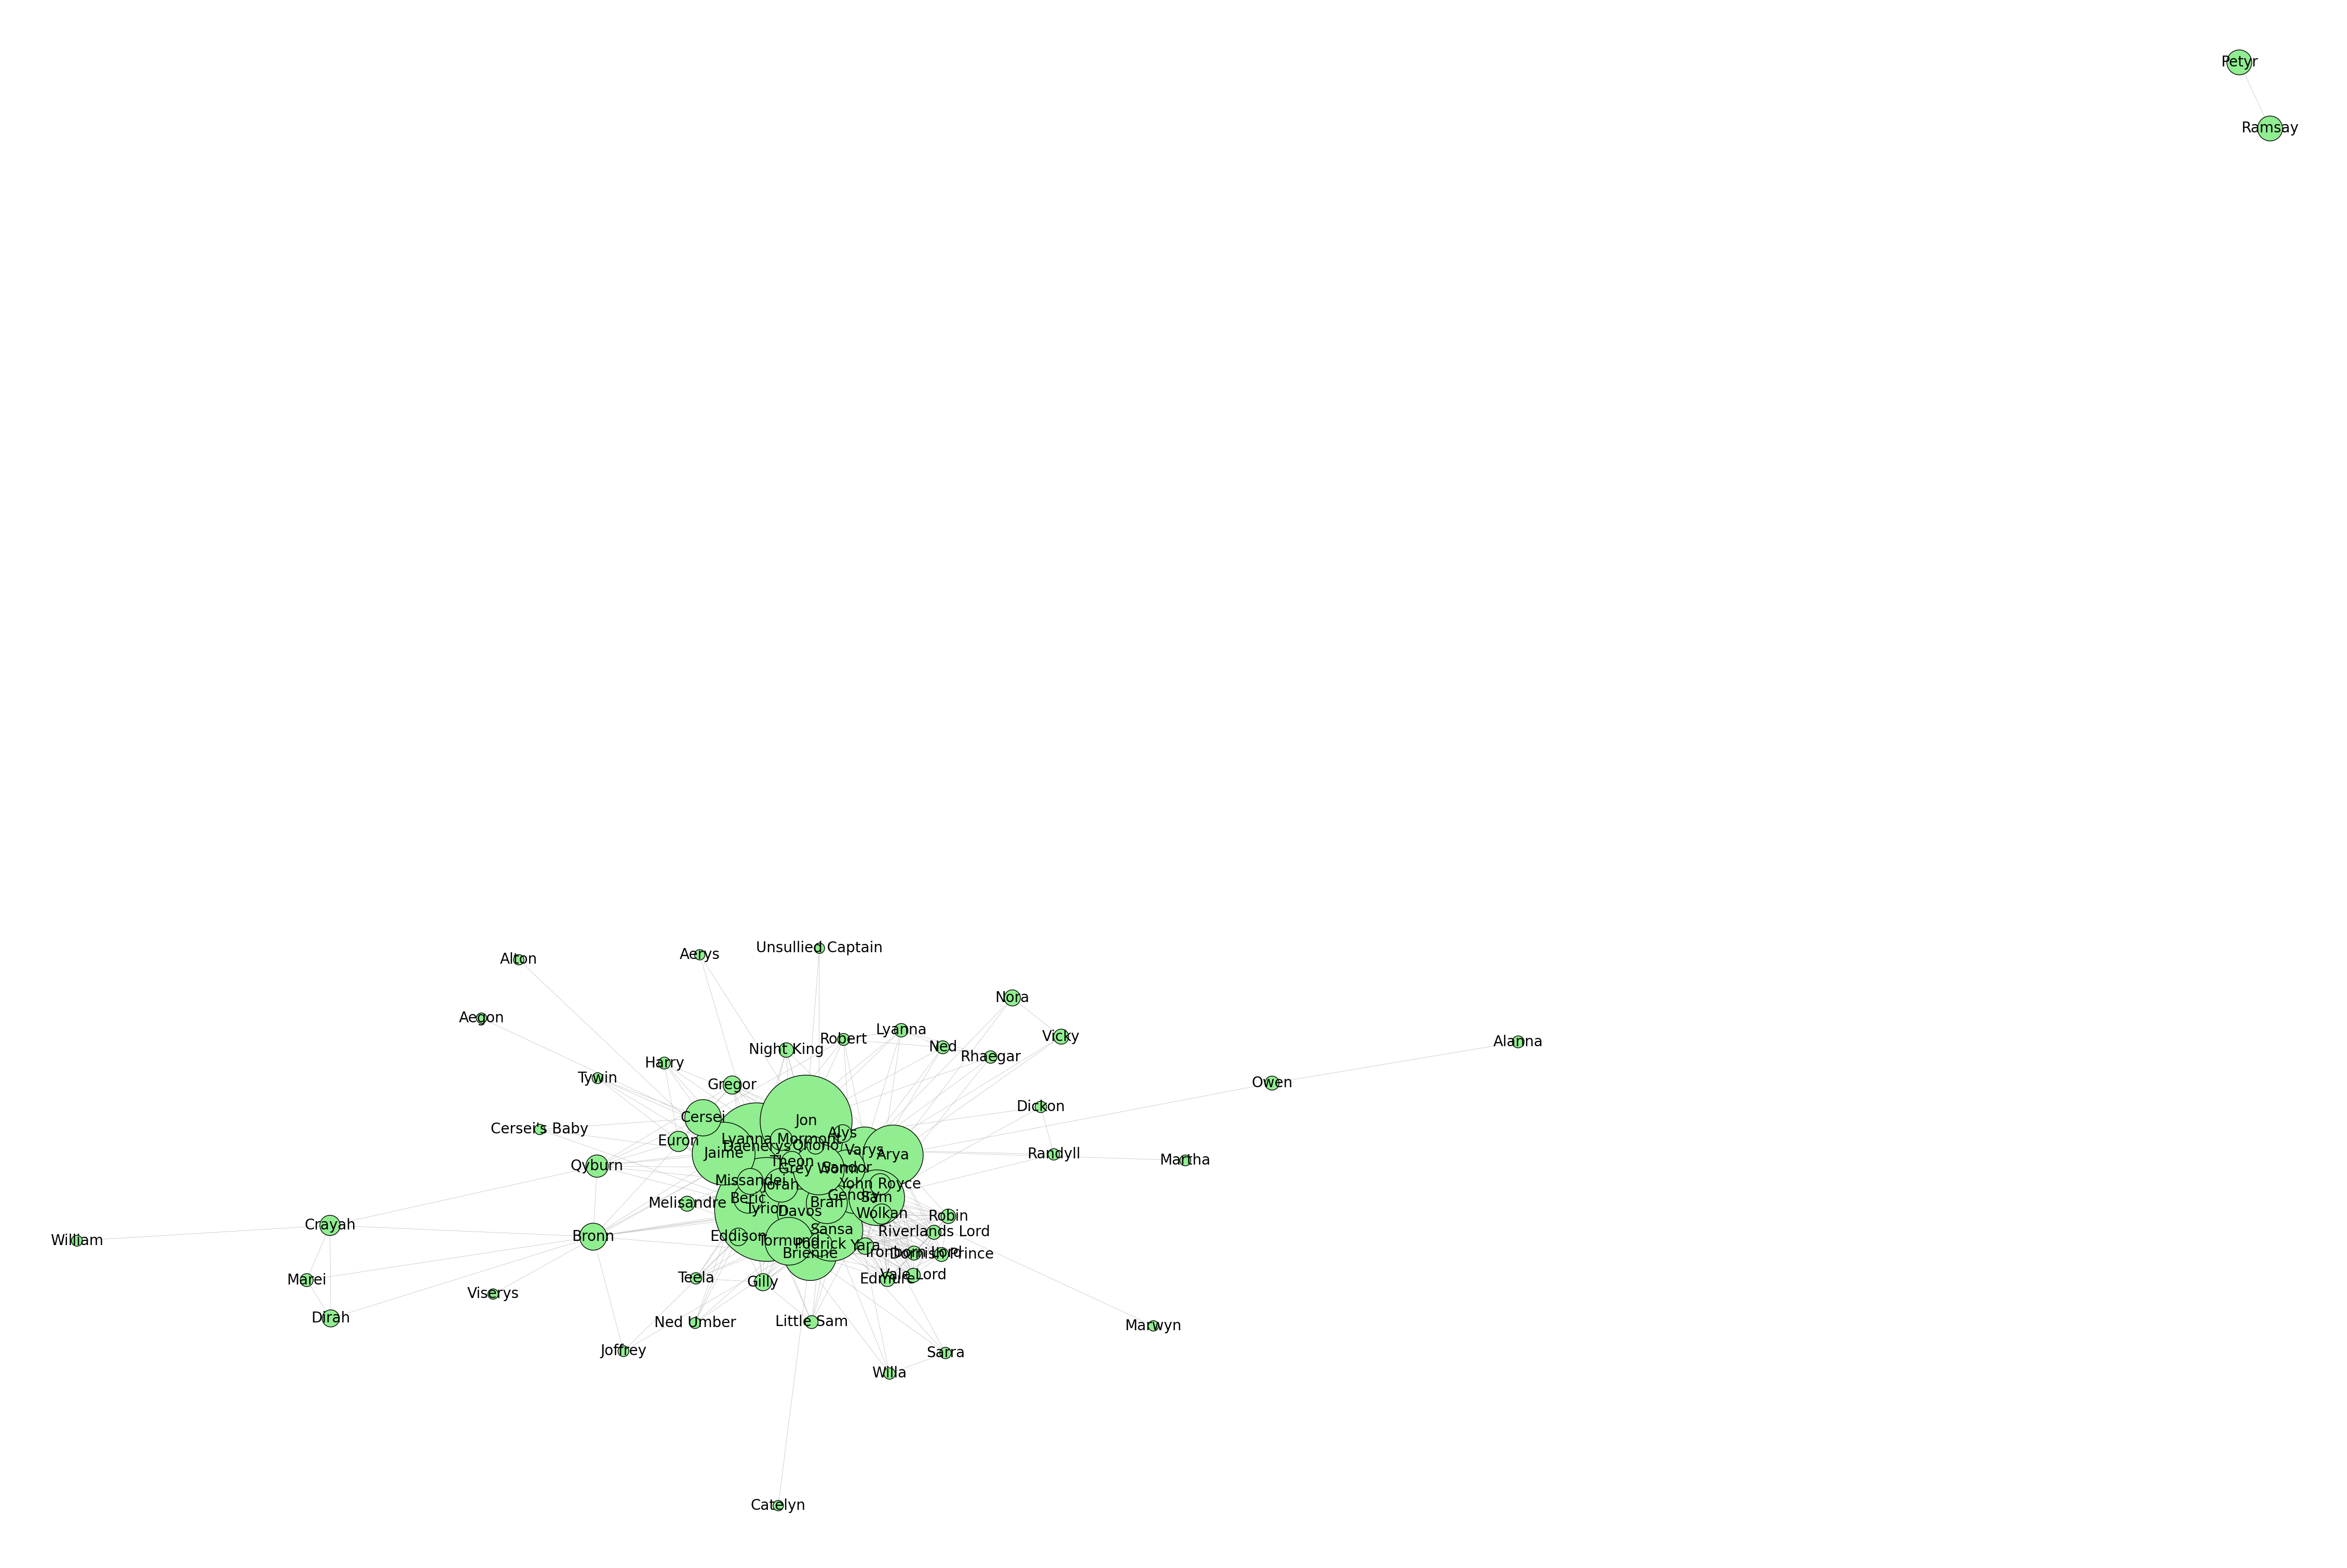

In [7]:
g = ig.Graph.from_networkx(G)


spring_layout = nx.spring_layout(G)


node_colors = ["LightGreen" for _ in range(len(G.nodes()))]


pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)

# Set the node sizes based on PageRank
min_size = 20  # Minimum node size
max_size = 200  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))


positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores


fig, ax = plt.subplots(figsize=(45, 30))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()



In [8]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "CERSEI"
node2 = "DAENERYS"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

The strength of the edge between 'CERSEI' and 'DAENERYS' is 36.


Let's list the various characters

In [9]:
for nm in g.vs():
  print(nm['Label'])

Daenerys
Jon
Tyrion
Jaime
Brienne
Varys
Sansa
Davos
Arya
Gendry
Sam
Sandor
Bran
Jorah
Grey Worm
Tormund
Cersei
Qyburn
Bronn
Euron
Beric
Podrick
Theon
Missandei
Gregor
Nora
Vicky
Night King
Lyanna Mormont
Eddison
Yohn Royce
Melisandre
Crayah
Dirah
Wolkan
Harry
Gilly
Martha
Little Sam
Lyanna
Alys
Yara
Ned
Rhaegar
Qhono
Marei
Edmure
Robert
Joffrey
Willa
Tywin
Owen
Viserys
Teela
Dornish Prince
Robin
Ned Umber
Randyll
Riverlands Lord
Vale Lord
Unsullied Captain
Sarra
Ironborn Lord
Marwyn
Aegon
Aerys
Alanna
Alton
Catelyn
Cersei's Baby
William
Dickon
Petyr
Ramsay


### Size

In [10]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

Number of possible edges (N*(N-1)): 2701
Number of nodes (Graph Order): 74
Number of edges (Graph Size): 553
Graph Density: 0.20473898556090336


### Distribution

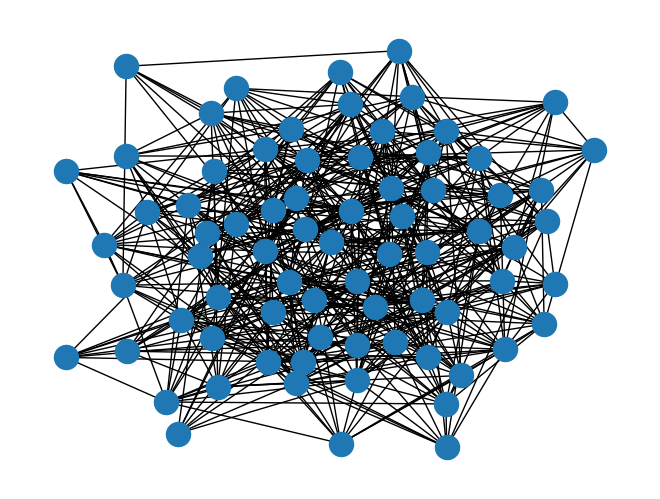

In [11]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [12]:
#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("number of nodes in random net:", len(rand_net.nodes()), "number of edges in random net", len(rand_net.edges()))
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

number of nodes in random net: 74 number of edges in random net 554
average shortest path for the random network 1.8248796741947426
clustering coefficient for the random network 0.21548413888399062


In [13]:
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)


# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the original network", avg_shortest_path / nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the original network", nx.average_clustering(G) / nx.average_clustering(rand_net))


normalised average shortest path for the original network 1.1311226616705259
normalised clustering coefficient for the original network 3.1310000014541406


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [14]:
# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
lambda_val = avg_shortest_path / nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G) / nx.average_clustering(rand_net)

# Check small-world criteria
if lambda_val >= 1 and gamma_val > 1:
    print("This network is a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
    print("This network is not a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")


This network is a small-world network
Lambda value: 1.1311226616705259, Gamma value: 3.1310000014541406


In [15]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [16]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

Graph is not connected


### Diameter

The diameter is the highest distance in the network

In [17]:
print("Graph Diameter:", g.diameter(directed=False))

Graph Diameter: 6


Path between most distant nodes: ['Alanna', 'Owen', 'Arya', 'Daenerys', 'Qyburn', 'Crayah', 'William']


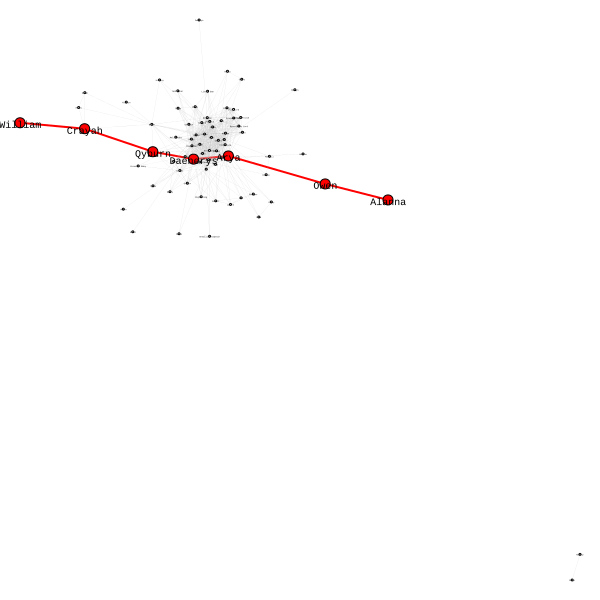

In [18]:
import networkx as nx
import igraph as ig

# Calculate the diameter path using igraph
d = g.get_diameter()

# GET NODES IN THE DIAMETER PATH
diameter_path = d

# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(pairs=[(d[i], d[i+1]) for i in range(len(d)-1)], directed=False)

# Visual style for plotting
visual_style = {
    "vertex_color": ["red" if node.index in diameter_path else "white" for node in g.vs],
    "edge_color": ["red" if edge.index in diameter_edges else "grey" for edge in g.es],
    "edge_width": [2 if edge.index in diameter_edges else 0.1 for edge in g.es],
    "vertex_label": [node["Label"] for node in g.vs],
    "vertex_size": [10 if node.index in diameter_path else 2 for node in g.vs],
    "vertex_label_size": [10 if node.index in diameter_path else 2 for node in g.vs]

}

print("Path between most distant nodes:", [g.vs[index]["Label"] for index in diameter_path])



# Plot the graph
ig.plot(g, **visual_style)


### Shortest Paths

Shortest paths between Daenerys and other nodes [['Daenerys'], ['Daenerys', 'Jon'], ['Daenerys', 'Tyrion'], ['Daenerys', 'Jaime'], ['Daenerys', 'Brienne'], ['Daenerys', 'Varys'], ['Daenerys', 'Sansa'], ['Daenerys', 'Davos'], ['Daenerys', 'Arya'], ['Daenerys', 'Gendry'], ['Daenerys', 'Sam'], ['Daenerys', 'Sandor'], ['Daenerys', 'Bran'], ['Daenerys', 'Jorah'], ['Daenerys', 'Grey Worm'], ['Daenerys', 'Tormund'], ['Daenerys', 'Cersei'], ['Daenerys', 'Qyburn'], ['Daenerys', 'Bronn'], ['Daenerys', 'Euron'], ['Daenerys', 'Beric'], ['Daenerys', 'Podrick'], ['Daenerys', 'Theon'], ['Daenerys', 'Missandei'], ['Daenerys', 'Gregor'], ['Daenerys', 'Sandor', 'Nora'], ['Daenerys', 'Arya', 'Nora'], ['Daenerys', 'Sandor', 'Vicky'], ['Daenerys', 'Arya', 'Vicky'], ['Daenerys', 'Night King'], ['Daenerys', 'Lyanna Mormont'], ['Daenerys', 'Eddison'], ['Daenerys', 'Yohn Royce'], ['Daenerys', 'Qhono', 'Melisandre'], ['Daenerys', 'Beric', 'Melisandre'], ['Daenerys', 'Tormund', 'Melisandre'], ['Daenerys', 'Grey 

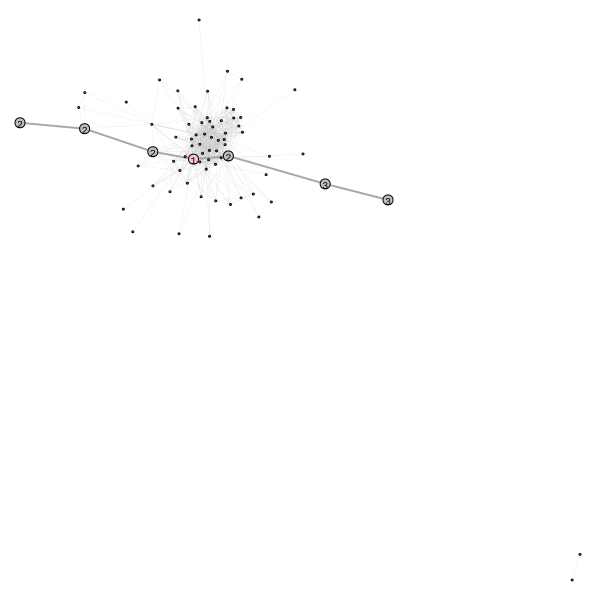

In [19]:
# SHORTEST PATHS
shortest_paths = {}
for node in nodes:
    shortest_paths[node["Label"]]=[nodes[v]["Label"] for v in g.get_all_shortest_paths(node)
                                                    ]
# SHOW DISTANCES OF SHORTEST PATHS BETWEEN ONE NODE AND EVERYBODY ELSE

node_name = "Daenerys"
print("Shortest paths between", node_name,"and other nodes", shortest_paths[node_name])

distances = [len(path) for path in shortest_paths[node_name]]

visual_style["vertex_color"] = ["pink" if node["Label"]==node_name else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

visual_style["vertex_label"] = distances

ig.plot(g, **visual_style)

In [20]:
sp = dict(nx.shortest_path(G)) #between all nodes
print(sp)

{'DAENERYS': {'DAENERYS': ['DAENERYS'], 'JON': ['DAENERYS', 'JON'], 'TYRION': ['DAENERYS', 'TYRION'], 'SANSA': ['DAENERYS', 'SANSA'], 'JORAH': ['DAENERYS', 'JORAH'], 'VARYS': ['DAENERYS', 'VARYS'], 'GREY_WORM': ['DAENERYS', 'GREY_WORM'], 'CERSEI': ['DAENERYS', 'CERSEI'], 'SAM': ['DAENERYS', 'SAM'], 'JAIME': ['DAENERYS', 'JAIME'], 'MISSANDEI': ['DAENERYS', 'MISSANDEI'], 'ARYA': ['DAENERYS', 'ARYA'], 'GENDRY': ['DAENERYS', 'GENDRY'], 'DAVOS': ['DAENERYS', 'DAVOS'], 'BRAN': ['DAENERYS', 'BRAN'], 'TORMUND': ['DAENERYS', 'TORMUND'], 'BRIENNE': ['DAENERYS', 'BRIENNE'], 'THEON': ['DAENERYS', 'THEON'], 'EURON': ['DAENERYS', 'EURON'], 'MAESTER_WOLKAN': ['DAENERYS', 'MAESTER_WOLKAN'], 'NIGHT_KING': ['DAENERYS', 'NIGHT_KING'], 'HOUND': ['DAENERYS', 'HOUND'], 'LYANNA_MORMONT': ['DAENERYS', 'LYANNA_MORMONT'], 'YOHN_ROYCE': ['DAENERYS', 'YOHN_ROYCE'], 'ALYS': ['DAENERYS', 'ALYS'], 'BERIC': ['DAENERYS', 'BERIC'], 'MOUNTAIN': ['DAENERYS', 'MOUNTAIN'], 'PODRICK': ['DAENERYS', 'PODRICK'], 'QHONO': ['DAE

<class 'networkx.utils.decorators.argmap'> compilation 63:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [21]:
i = 0
for _, v in sp.items():
  for char, dic in v.items():
    if len(dic) == len(diameter_path):
      i = i+1

print("The number of the shortest path long as the diameter are", i)

The number of the shortest path long as the diameter are 2


In [22]:
# AVERAGE SHORTEST PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE

if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

Average shortest path length: 2.064162754303599


### Node Degrees

In [23]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)


degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)

# Print results
print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



Node degrees:
First 10 nodes with highest degree
         Node  Degree  Average degree of node's neighbours
10        Sam      42                            22.238095
0    Daenerys      41                            21.195122
2      Tyrion      41                            23.024390
6       Sansa      40                            23.250000
8        Arya      39                            23.615385
14  Grey Worm      38                            24.394737
7       Davos      37                            24.837838
1         Jon      36                            23.055556
4     Brienne      34                            26.176471
3       Jaime      32                            25.531250


Last 5 nodes with lowest degree
       Node  Degree  Average degree of node's neighbours
66   Alanna       1                                  2.0
64    Aegon       1                                 41.0
63   Marwyn       1                                 42.0
52  Viserys       1                     

In [24]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

maximum degree: 42
minimum degree: 1
average degree: 14.945945945945946
most frequent degree (mode): 1 with 10 nodes


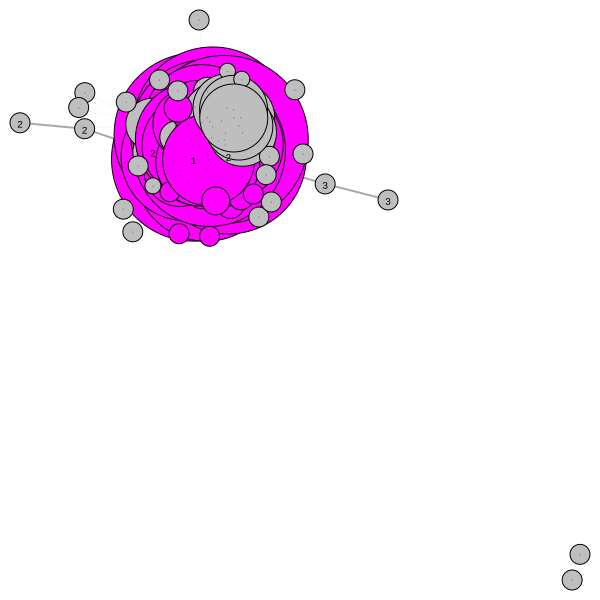

In [25]:
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [4*degree if degree>3 else 20 for degree in g.degree()]

#COLOR NEAREST NEIGHBORS OF A CERTAIN NODE
node_name = "Jon"
for node in nodes:
    if node["Label"] == node_name:
        node_index = node.index

neighbors = g.neighborhood(nodes[node_index],order=1)
visual_style["vertex_color"] = ["fuchsia" if node.index in neighbors else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

ig.plot(g, **visual_style)

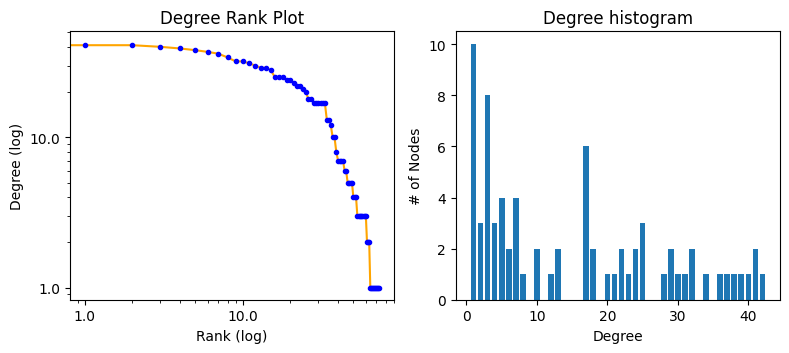

In [26]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank (log)")
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


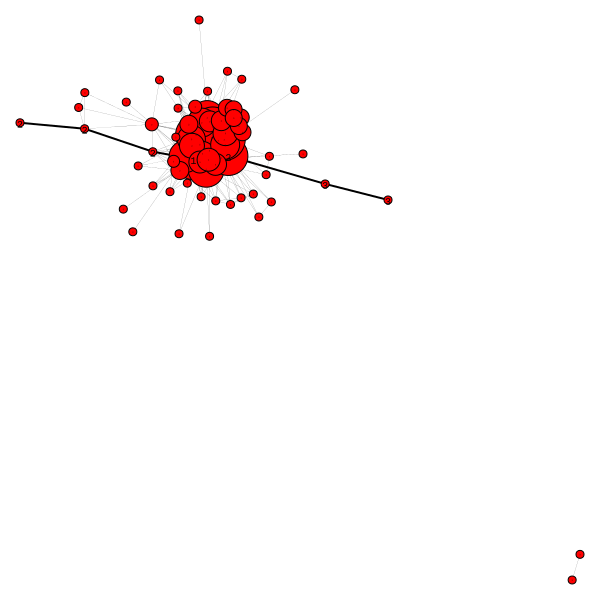

In [27]:
visual_style["vertex_size"] = [degree if degree>10 else 8 for degree in g.degree()]
visual_style['edge_color'] = 'black'
visual_style['vertex_color'] = 'red'
ig.plot(g, **visual_style)

### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [28]:
bridges = g.bridges()

if bridges:
    print("The network has bridges.")
    bridge_labels = [(g.vs[g.es[bridge].source]["Label"], g.vs[g.es[bridge].target]["Label"]) for bridge in bridges]
    print("The bridges are:", bridge_labels)
else:
    print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))

The network has bridges.
The bridges are: [('Daenerys', 'Viserys'), ('Daenerys', 'Aegon'), ('Jaime', 'Alton'), ('Brienne', 'Catelyn'), ('Varys', 'Martha'), ('Arya', 'Owen'), ('Sam', 'Marwyn'), ('Crayah', 'William'), ('Owen', 'Alanna'), ('Petyr', 'Ramsay')]
Number of bridges: 10


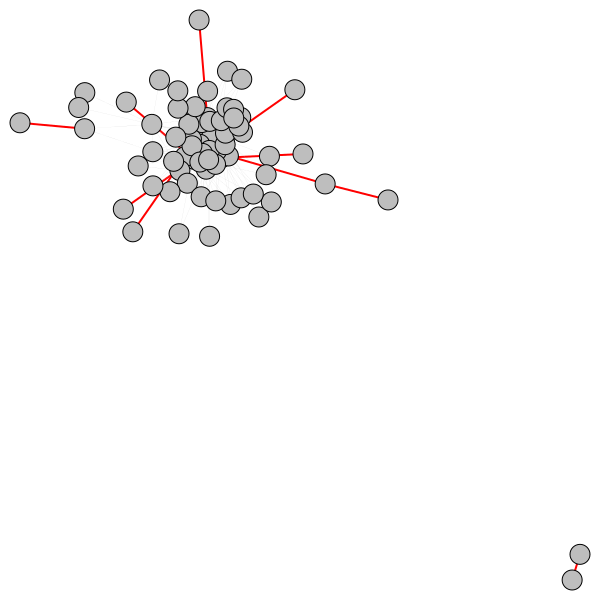

In [29]:
visual_style = {}

bridges_index = g.bridges()

visual_style["vertex_color"] = 'grey'
visual_style["edge_color"] = ["red" if edge.index in bridges_index else "grey" for edge in edges]
#visual_style["vertex_label"] = [g.vs[edge.source]["Label"] for edge in edges]
visual_style["edge_width"] = [2 if edge.index in bridges_index else 0.1 for edge in edges]
#visual_style["vertex_label_size"] = [10 if edge.index in bridges_index else 2 for edge in edges]

ig.plot(g, **visual_style)

### Giant Components



In [30]:
clusters = g.connected_components()
clusters = sorted(clusters, key=len, reverse=True)

# Get the largest connected component
largest_cc = clusters[0]
G0 = g.subgraph(largest_cc)

# Check if the original graph is isomorphic to the largest connected component
if g.isomorphic(G0):
    print("This network is connected and there are no isolated nodes")
else:
    print("This network has", len(clusters), "components")

This network has 2 components


### Centrality

In [31]:
# Degree Centrality
degree_cen = nx.degree_centrality(G)

# Weighted degree centrality
weighted_degree_cen = {node: sum(weight for _, _, weight in G.edges(node, data='Weight')) for node in G.nodes()}
# Normalize the weighted degree centrality
max_weighted_degree = max(weighted_degree_cen.values())
weighted_degree_cen = {node: centrality / max_weighted_degree for node, centrality in weighted_degree_cen.items()}

clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
har_cen = nx.harmonic_centrality(G)
pagerank_cen = nx.pagerank(G)

centrality_df = pd.DataFrame(data={
    'Node': list(bet_cen.keys()),
    'Betweenness centrality': list(bet_cen.values()),
    'Closeness centrality': list(clo_cen.values()),
    'Eigenvector centrality': list(eig_cen.values()),
    'Harmonic centrality': [1/x for x in har_cen.values()],
    'Degree centrality': list(degree_cen.values()),
    'Weighted degree centrality': list(weighted_degree_cen.values()),
    'PageRank centrality': list(pagerank_cen.values())
})

centrality_df



Node  Betweenness centrality  Closeness centrality  \
0       DAENERYS                0.133902              0.670435   
1            JON                0.056995              0.616561   
2         TYRION                0.063117              0.670435   
3          JAIME                0.052323              0.616561   
4        BRIENNE                0.040462              0.627771   
..           ...                     ...                   ...   
69  CERSEIS_BABY                0.000000              0.413502   
70       WILLIAM                0.000000              0.259604   
71        DICKON                0.000000              0.431592   
72  LITTLEFINGER                0.000000              0.013699   
73        RAMSAY                0.000000              0.013699   

    Eigenvector centrality  Harmonic centrality  Degree centrality  \
0             1.987398e-01             0.030303           0.561644   
1             1.896637e-01             0.019169           0.493151   
2             2.178962e-01             0.021429           0.561644   
3             1.849756e-01             0.018634           0.438356   
4             2.060621e-01             0.049261           0.465753   
..                     ...                  ...                ...   
69            1.884406e-02             0.020583           0.041096   
70            1.657843e-04             0.021127           0.013699   
71            1.667577e-02             0.030303           0.041096   
72            7.812310e-13             0.021239           0.013699   
73            7.812310e-13             0.034642           0.013699   

    Weighted degree centrality  PageRank centrality  
0                     0.793785             0.037574  
1                     0.860640             0.029895  
2                     1.000000             0.032224  
3                     0.551789             0.026965  
4                     0.448211             0.026858  
..                         ...                  ...  
69                    0.005650             0.004201  
70                    0.001883             0.003942  
71                    0.005650             0.004902  
72                    0.001883             0.013514  
73                    0.001883             0.013514  

[74 rows x 8 columns]

In [32]:
print("Mean values of Centralities:")
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))
print("Weighted Degree:", np.mean(list(weighted_degree_cen.values())))
print("PageRank:", np.mean(list(pagerank_cen.values())))

Mean values of Centralities:
Betweenness: 0.013986589329055082
Closeness: 0.4782219603825287
Eigenvector: 0.0879671640583735
Harmonic: 0.025599926198410956
Degree: 0.20473898556090336
Weighted Degree: 0.14193006565887922
PageRank: 0.013513513513513514


In [33]:
def highest_centrality(centrality_dict):
    # Sort items by centrality score in descending order and return the top one
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[0]

def k_highest_centrality(centrality_dict, k):
    # Sort items by centrality score in descending order and return the top k
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[:k]

In [34]:
highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = zip(*highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = zip(*highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = zip(*highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = zip(*highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = zip(*highest_centrality_degree_cen)

highest_centrality_weighted_degree_cen = k_highest_centrality(weighted_degree_cen, 5)
weighted_degree_cen_char, weighted_degree_cen_scores = zip(*highest_centrality_weighted_degree_cen)

highest_centrality_pagerank_cen = k_highest_centrality(pagerank_cen, 5)
pagerank_cen_char, pagerank_cen_scores = zip(*highest_centrality_pagerank_cen)

# Update the DataFrame to display the top 5 most central nodes for each measure correctly
centrality_df = pd.DataFrame(data={
    'Most central character - Betweenness': bet_cen_char,
    'Score - Betweenness': bet_cen_scores,
    'Most central character - Closeness': clo_cen_char,
    'Score - Closeness': clo_cen_scores,
    'Most central character - Eigenvector': eig_cen_char,
    'Score - Eigenvector': eig_cen_scores,
    'Most central character - Harmonic': har_cen_char,
    'Score - Harmonic': [1/x for x in har_cen_scores],
    'Most central character - Degree': degree_cen_char,
    'Score - Degree': degree_cen_scores,
    'Most central character - Weighted Degree': weighted_degree_cen_char,
    'Score - Weighted Degree': weighted_degree_cen_scores,
    'Most central character - PageRank': pagerank_cen_char,
    'Score - PageRank': pagerank_cen_scores
})


centrality_df

Most central character - Betweenness  Score - Betweenness  \
0                             DAENERYS             0.133902   
1                                  SAM             0.099133   
2                                 ARYA             0.099021   
3                                BRONN             0.082401   
4                               TYRION             0.063117   

  Most central character - Closeness  Score - Closeness  \
0                                SAM           0.677008   
1                           DAENERYS           0.670435   
2                             TYRION           0.670435   
3                              DAVOS           0.645372   
4                              SANSA           0.639396   

  Most central character - Eigenvector  Score - Eigenvector  \
0                               TYRION             0.217896   
1                                  SAM             0.217152   
2                                SANSA             0.215813   
3                            GREY_WORM             0.214918   
4                                 ARYA             0.213826   

  Most central character - Harmonic  Score - Harmonic  \
0                               SAM          0.017804   
1                          DAENERYS          0.017964   
2                            TYRION          0.017964   
3                             SANSA          0.018321   
4                              ARYA          0.018433   

  Most central character - Degree  Score - Degree  \
0                             SAM        0.575342   
1                        DAENERYS        0.561644   
2                          TYRION        0.561644   
3                           SANSA        0.547945   
4                            ARYA        0.534247   

  Most central character - Weighted Degree  Score - Weighted Degree  \
0                                   TYRION                 1.000000   
1                                      JON                 0.860640   
2                                 DAENERYS                 0.793785   
3                                    JAIME                 0.551789   
4                                    SANSA                 0.543315   

  Most central character - PageRank  Score - PageRank  
0                          DAENERYS          0.037574  
1                               SAM          0.034943  
2                              ARYA          0.032486  
3                            TYRION          0.032224  
4                             SANSA          0.031296

### Homophily

In [35]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

Degree assortativity coefficient: -0.14882012486362955


In [36]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node      Second node     Score
537          EDMURE    IRONBORN_LORD  0.888889
546           ROBIN  RIVERLANDS_LORD  0.888889
544  DORNISH_PRINCE        VALE_LORD  0.888889
543  DORNISH_PRINCE  RIVERLANDS_LORD  0.888889
547           ROBIN        VALE_LORD  0.888889
..              ...              ...       ...
279            ARYA             OWEN  0.000000
509          CRAYAH          WILLIAM  0.000000
178           VARYS           MARTHA  0.000000
165         BRIENNE          CATELYN  0.000000
552    LITTLEFINGER           RAMSAY  0.000000

[553 rows x 3 columns]

### Triangles

In [37]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

List of all the edges involved in the traingles


[('DAENERYS', 'JON', 'TYRION'),
 ('DAENERYS', 'JON', 'SANSA'),
 ('DAENERYS', 'JON', 'JORAH'),
 ('DAENERYS', 'JON', 'VARYS'),
 ('DAENERYS', 'JON', 'GREY_WORM'),
 ('DAENERYS', 'JON', 'CERSEI'),
 ('DAENERYS', 'JON', 'SAM'),
 ('DAENERYS', 'JON', 'JAIME'),
 ('DAENERYS', 'JON', 'MISSANDEI'),
 ('DAENERYS', 'JON', 'ARYA'),
 ('DAENERYS', 'JON', 'GENDRY'),
 ('DAENERYS', 'JON', 'DAVOS'),
 ('DAENERYS', 'JON', 'BRAN'),
 ('DAENERYS', 'JON', 'TORMUND'),
 ('DAENERYS', 'JON', 'BRIENNE'),
 ('DAENERYS', 'JON', 'THEON'),
 ('DAENERYS', 'JON', 'MAESTER_WOLKAN'),
 ('DAENERYS', 'JON', 'NIGHT_KING'),
 ('DAENERYS', 'JON', 'HOUND'),
 ('DAENERYS', 'JON', 'LYANNA_MORMONT'),
 ('DAENERYS', 'JON', 'YOHN_ROYCE'),
 ('DAENERYS', 'JON', 'ALYS'),
 ('DAENERYS', 'JON', 'BERIC'),
 ('DAENERYS', 'JON', 'PODRICK'),
 ('DAENERYS', 'JON', 'QHONO'),
 ('DAENERYS', 'JON', 'AERYS'),
 ('DAENERYS', 'JON', 'EDDISON_TOLLETT'),
 ('DAENERYS', 'JON', 'LYANNA'),
 ('DAENERYS', 'JON', 'ROBERT'),
 ('DAENERYS', 'TYRION', 'SANSA')]

In [38]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

Character  # of triangles in which they are involved
2      TYRION                                        407
10        SAM                                        400
14  GREY_WORM                                        396
6       SANSA                                        396
8        ARYA                                        390
7       DAVOS                                        390
4     BRIENNE                                        365
12       BRAN                                        342
0    DAENERYS                                        342
1         JON                                        317

In [39]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

There are 2983 triangles


Investigating interesting character triangles

Triangle ['DAENERYS', 'JON', 'TYRION'] has strength 432, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['DAENERYS', 'JON', 'SANSA'] has strength 335, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['TYRION', 'JAIME', 'BRIENNE'] has strength 289, the highest edge strength is 122, and the strongest edge is ('TYRION', 'JAIME')
Triangle ['DAENERYS', 'JON', 'VARYS'] has strength 287, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['DAENERYS', 'JON', 'SAM'] has strength 286, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['DAENERYS', 'JON', 'ARYA'] has strength 285, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['DAENERYS', 'JON', 'GREY_WORM'] has strength 281, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ['DAENERYS', 'TYRION', 'VARYS'] has

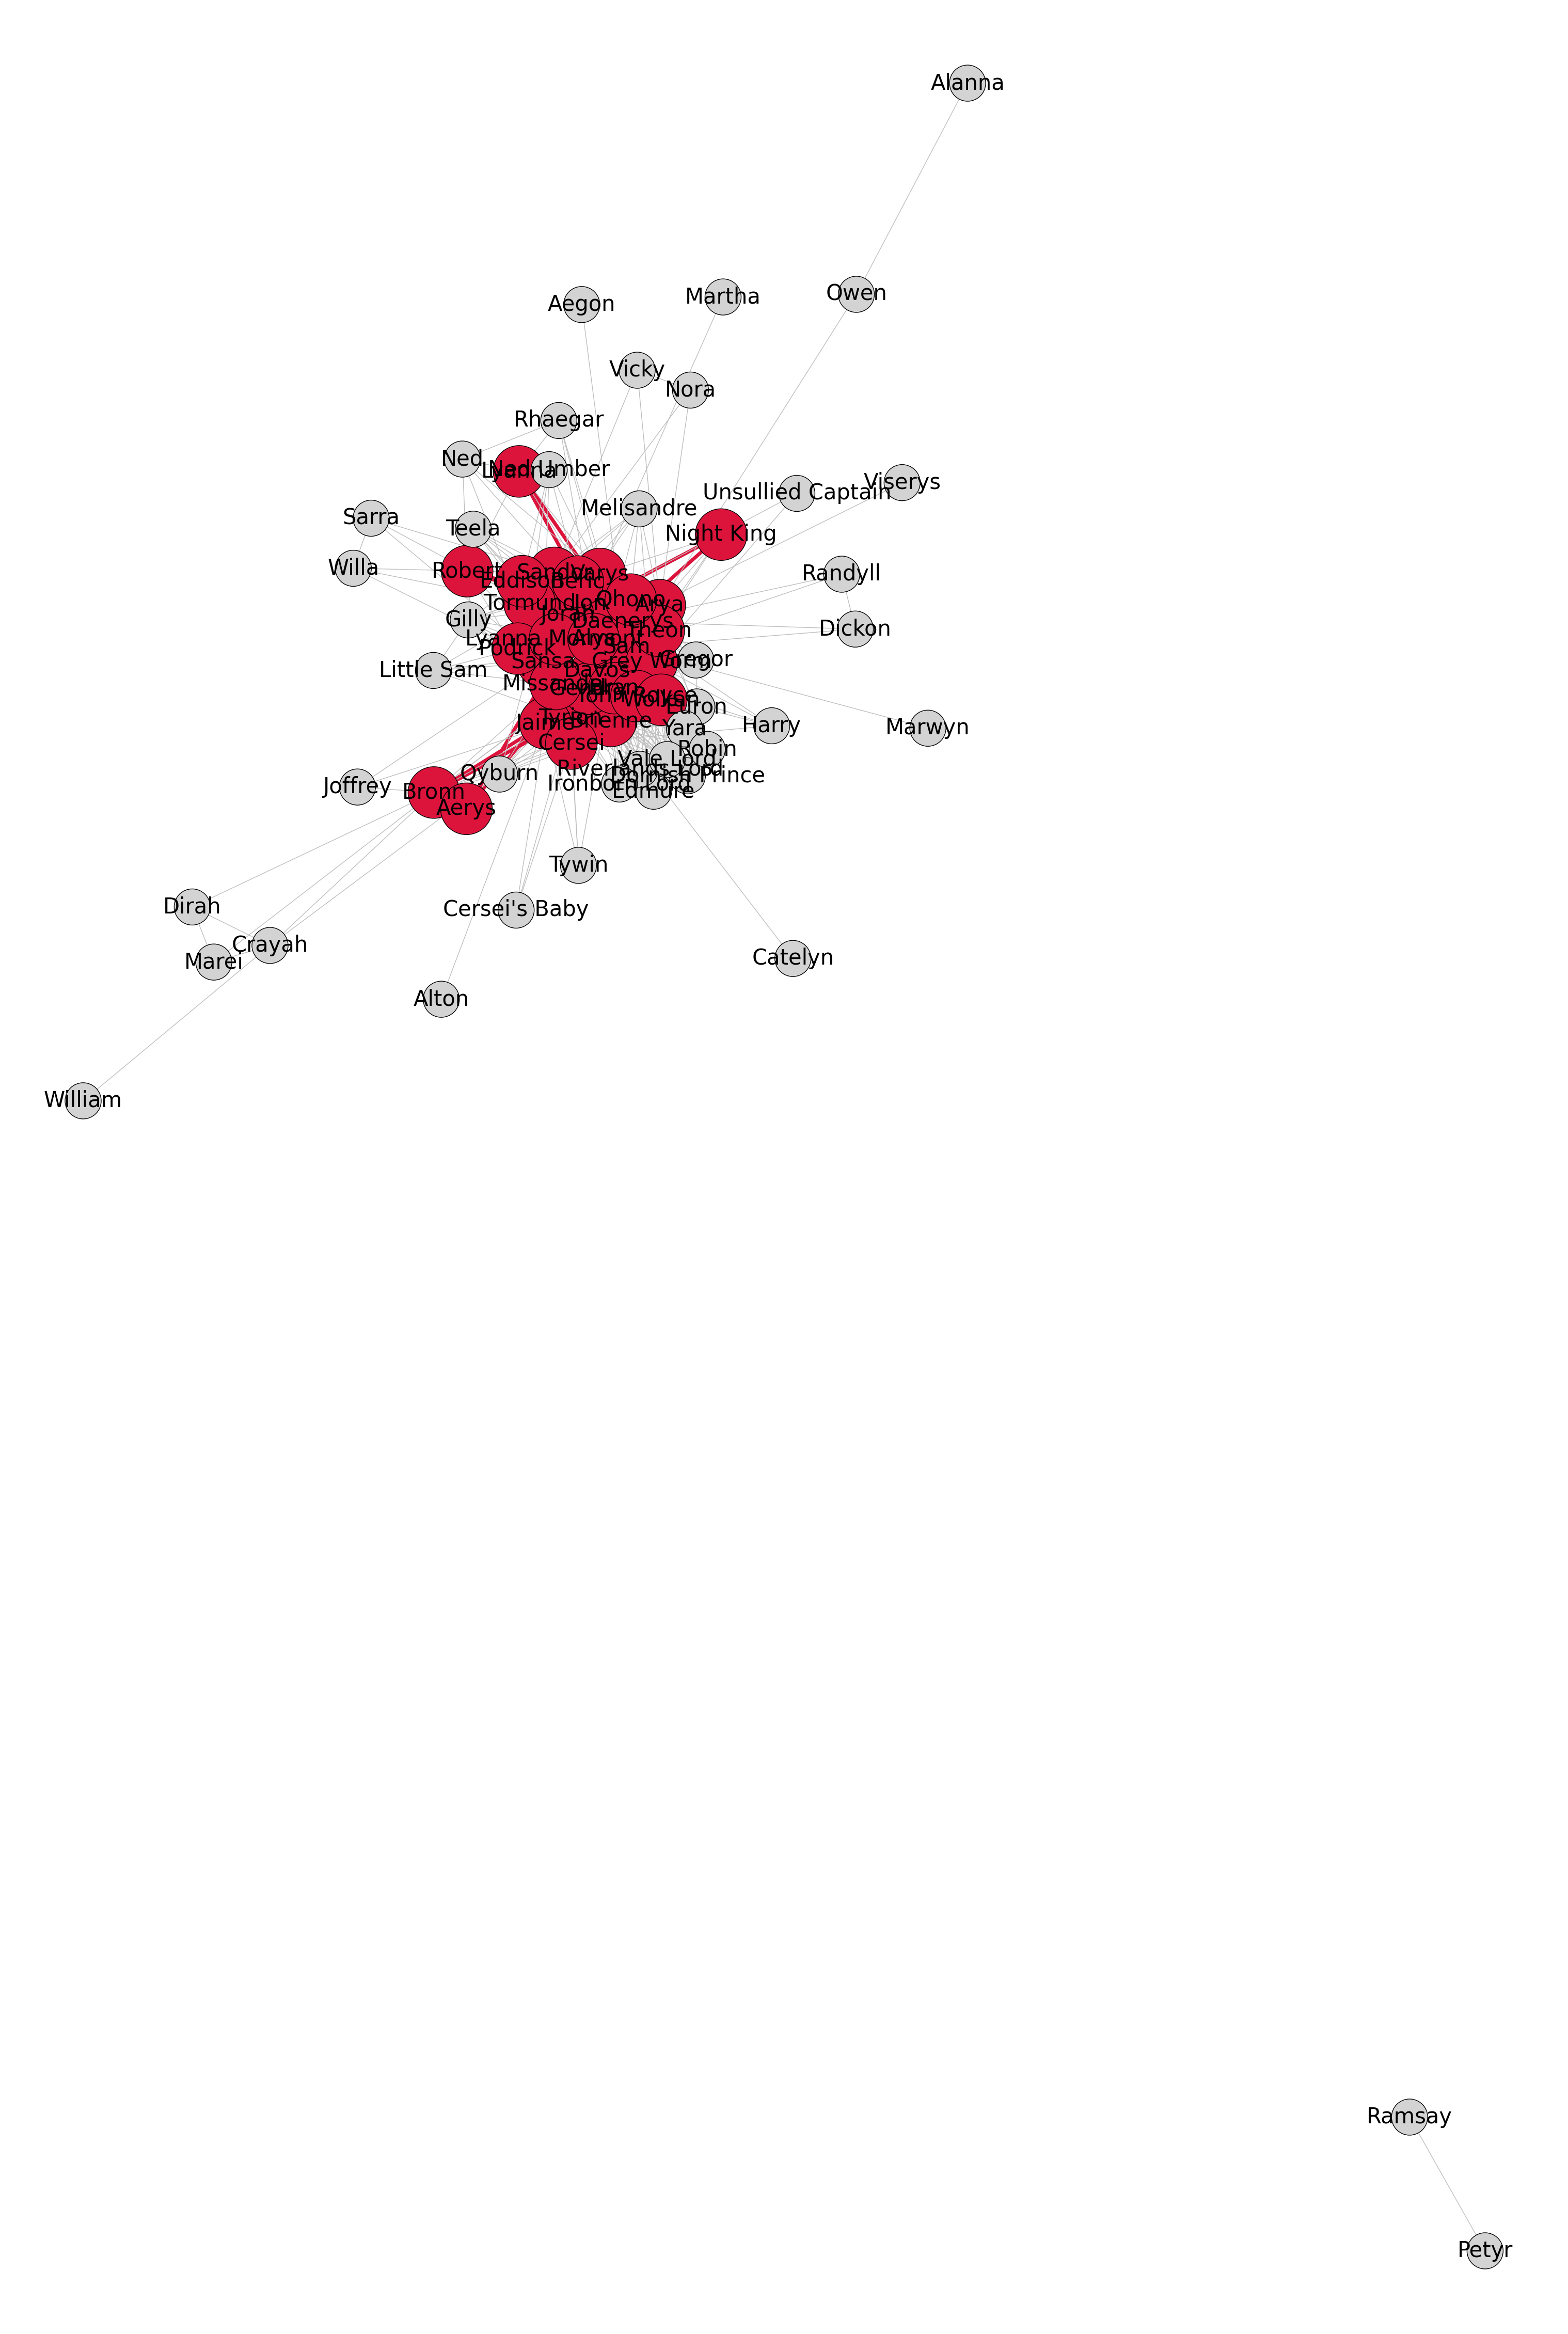

In [40]:
community_graph_layout_gn = nx.spring_layout(G)


default_node_color = "lightgrey"
default_edge_color = "grey"


node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())


edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())


edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge


triangles = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

# Compute the strengths and max edge weights of all triangles
triangle_strengths_and_max_edges = []
for triangle in triangles:
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

# Sort triangles by strength in descending order and select the top 10
top_triangles = sorted(triangle_strengths_and_max_edges, key=lambda x: x[1], reverse=True)[:70]

# Highlight the nodes and edges in the top 10 triangles
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    color = "Crimson"  # Use a single color for all top triangles or set a different color if needed
    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles


for triangle, strength, max_edge_weight, max_edge in top_triangles:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Triangle ('JON', 'ARYA', 'NIGHT_KING') has strength 92, the highest edge strength is 70, and the strongest edge is ('JON', 'ARYA')
Triangle ('DAENERYS', 'JON', 'TYRION') has strength 432, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ('DAENERYS', 'JON', 'SANSA') has strength 335, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ('DAENERYS', 'JON', 'CERSEI') has strength 233, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')


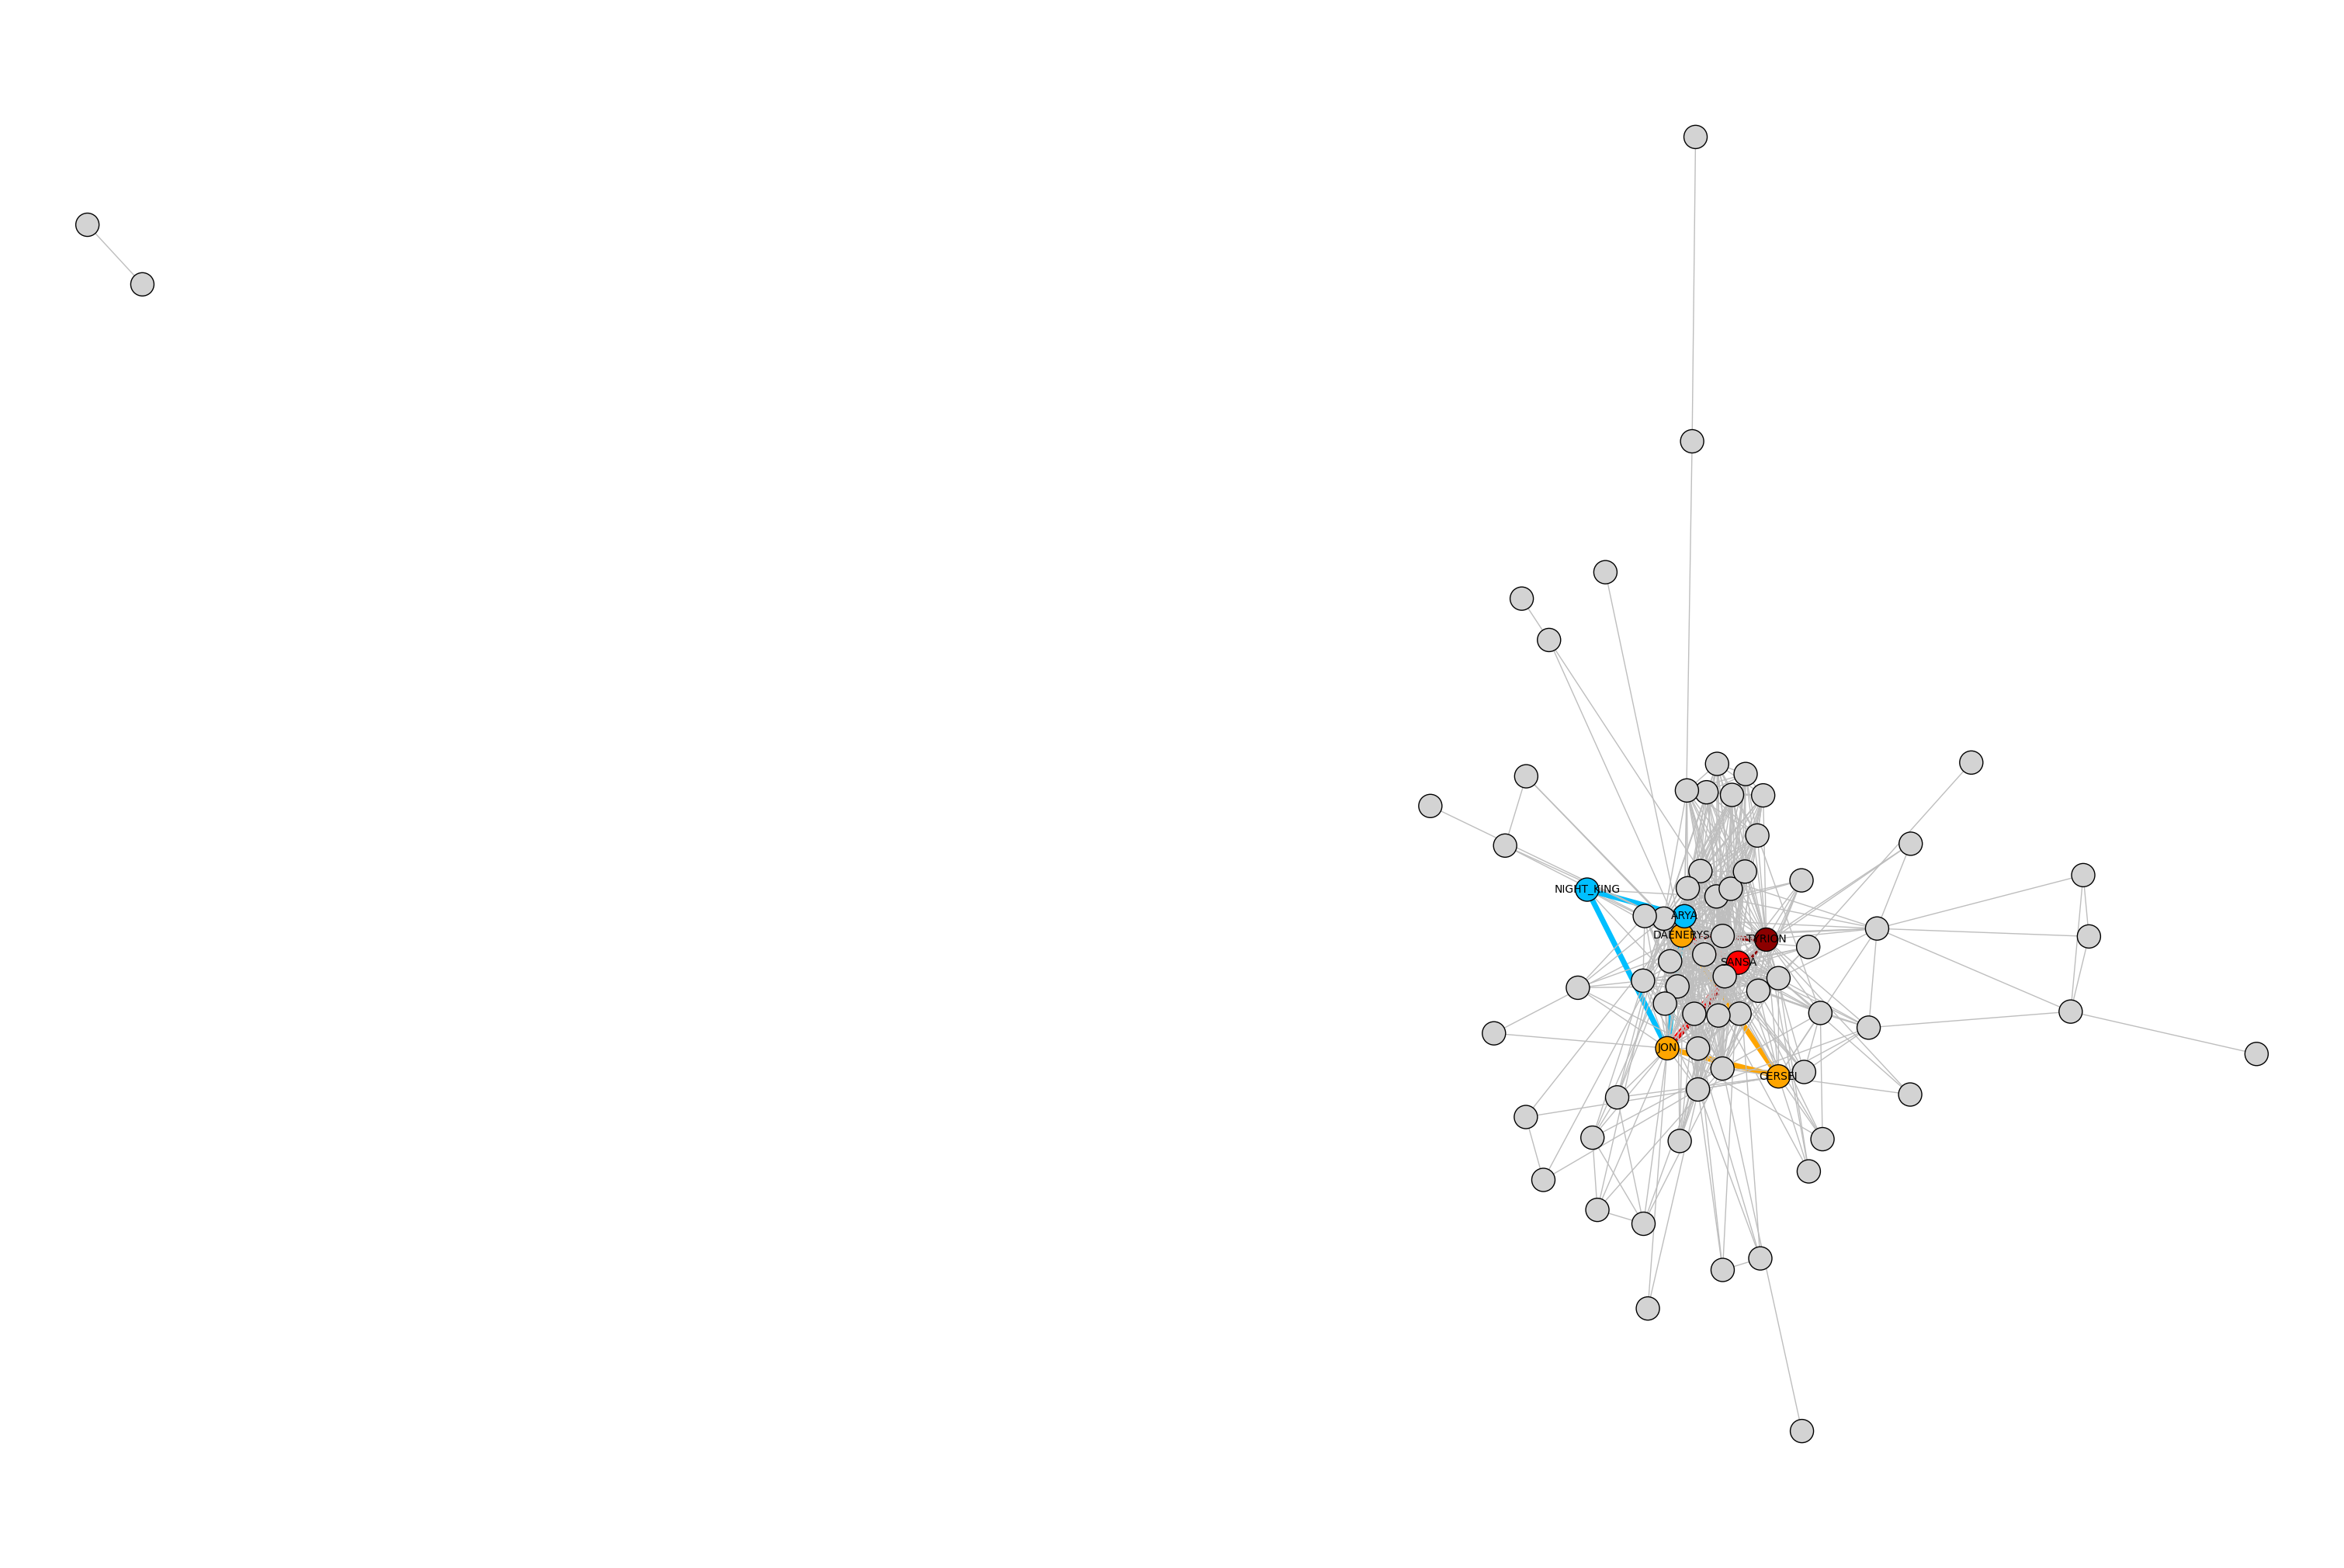

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Define the highlighted triangles with colors
highlighted_triangles = [
    (('JON', 'ARYA', 'NIGHT_KING'), "DeepSkyBlue"),
    (('DAENERYS', 'JON', 'TYRION'), "DarkRed"),
    (('DAENERYS', 'JON', 'SANSA'), "Red"),
    (('DAENERYS', 'JON', 'CERSEI'), "Orange")

]


community_graph_layout_gn = nx.spring_layout(G)


default_node_color = "lightgrey"
default_edge_color = "grey"


node_colors = [default_node_color] * len(G.nodes())
node_sizes = [30] * len(G.nodes())


edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())


edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
highlighted_nodes = set()  # To keep track of nodes part of triangles

for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            highlighted_nodes.add(node)  # Add node to highlighted set
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 30  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles


for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")


vertex_labels = {}
for node in G.nodes():
    if node in highlighted_nodes:
        vertex_labels[node] = node
    else:
        vertex_labels[node] = ""  # Hide labels of non-highlighted nodes


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=[vertex_labels[node] for node in G.nodes()],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Specifically about a character

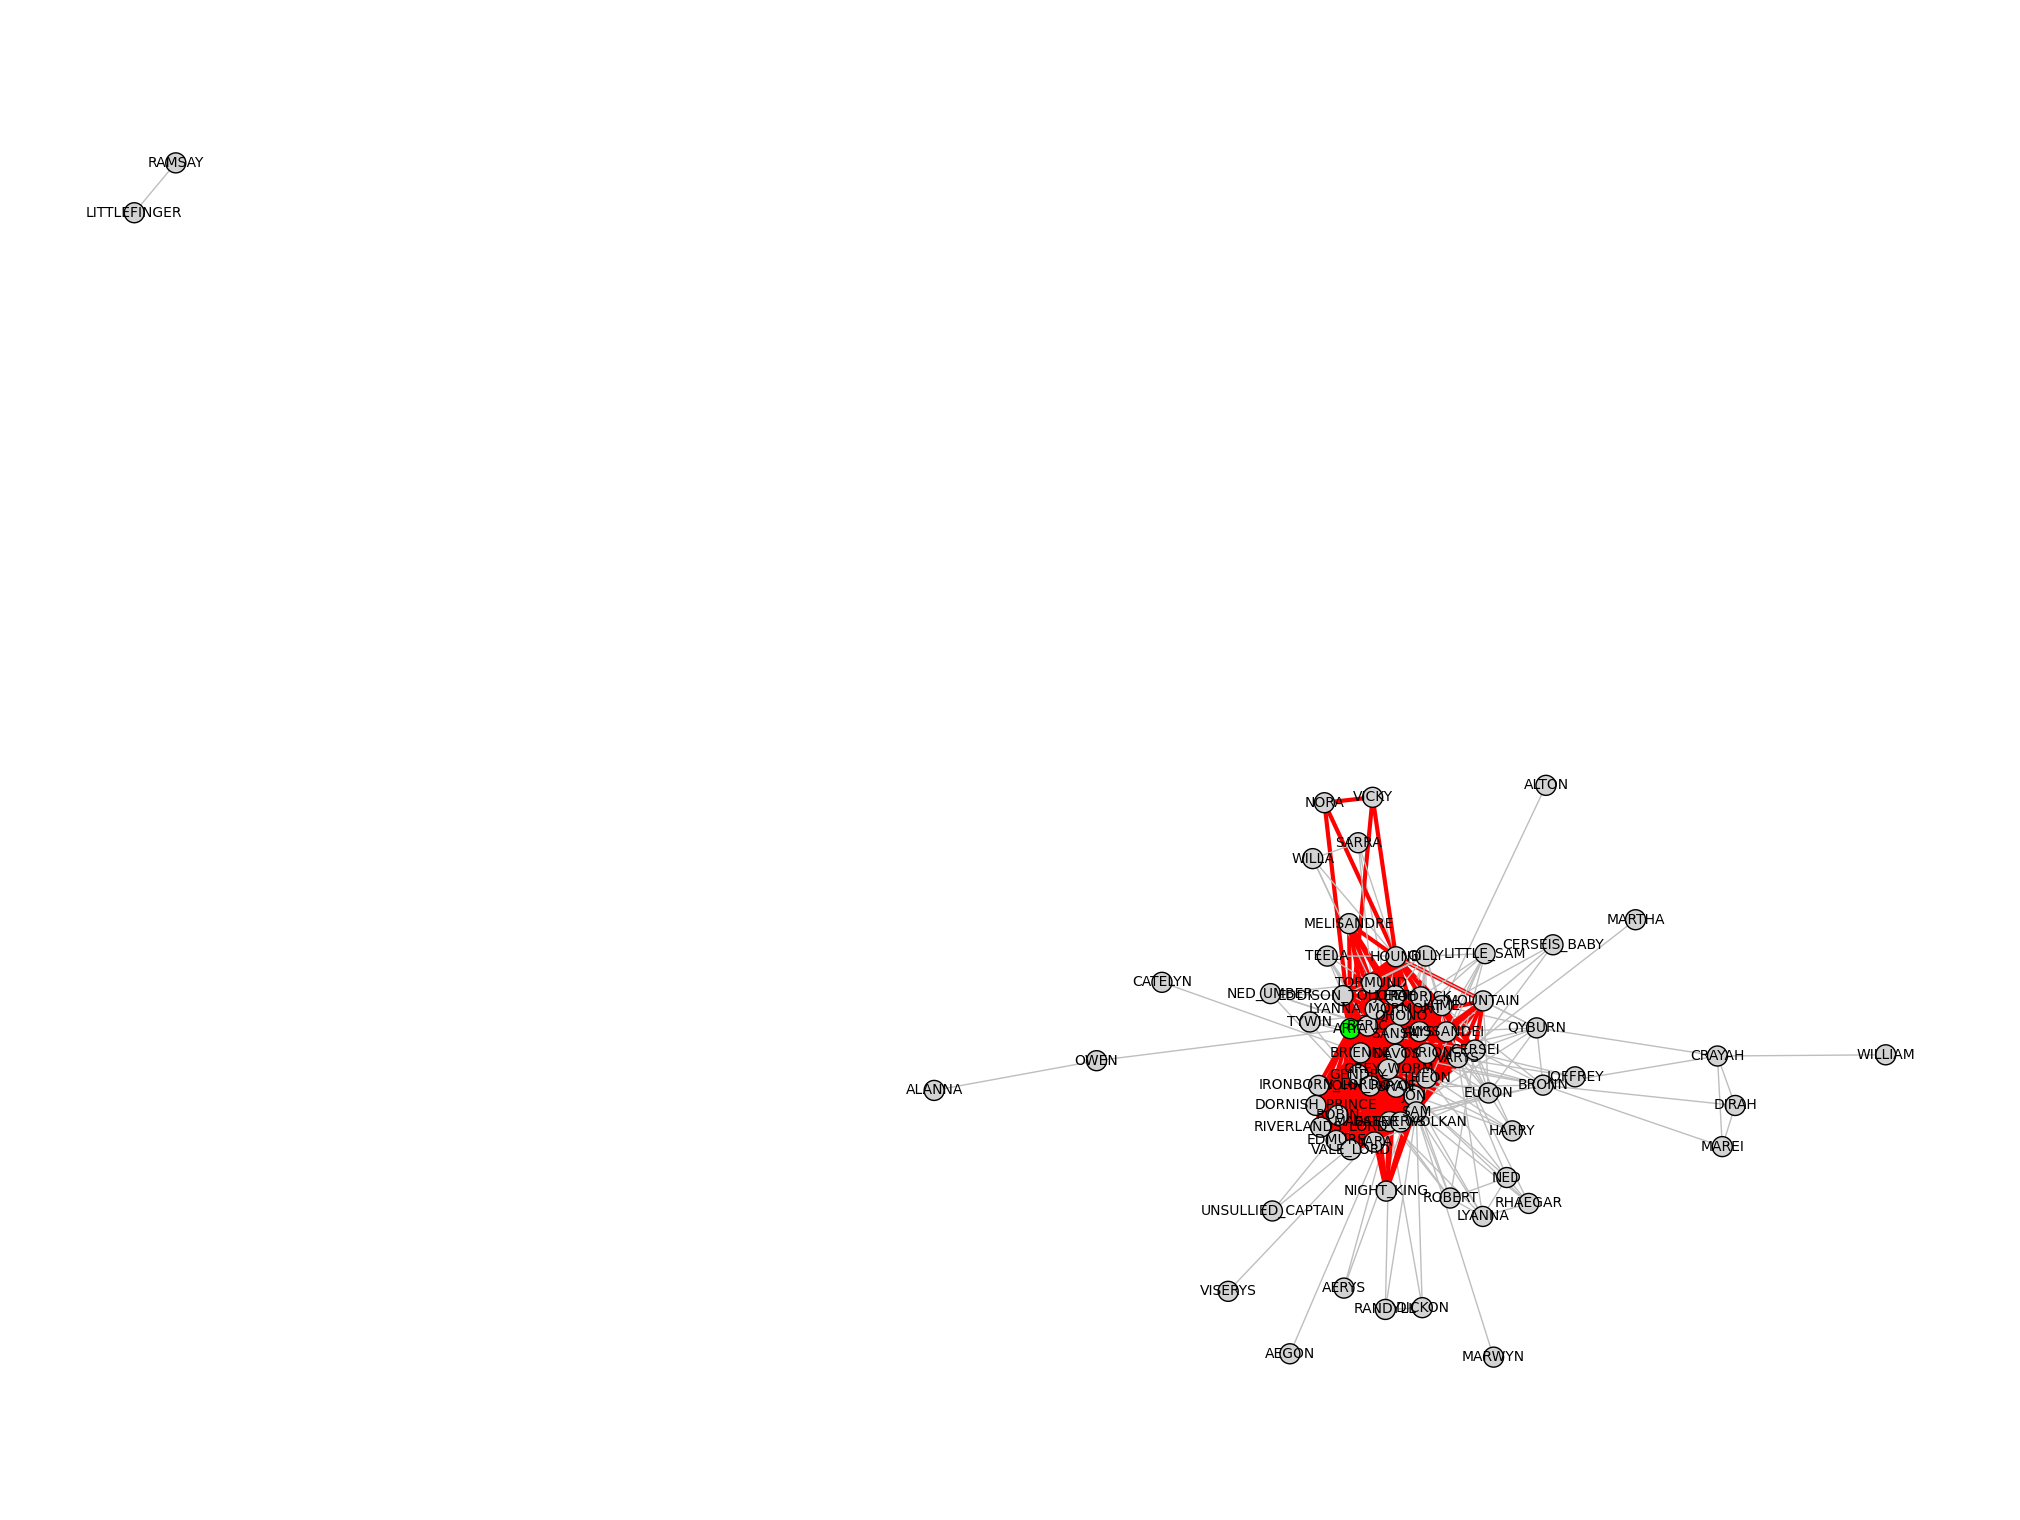

In [42]:
highlight_node = "ARYA"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles


community_graph_layout_gn = nx.spring_layout(G)


node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")


edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)

for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()


g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())


fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

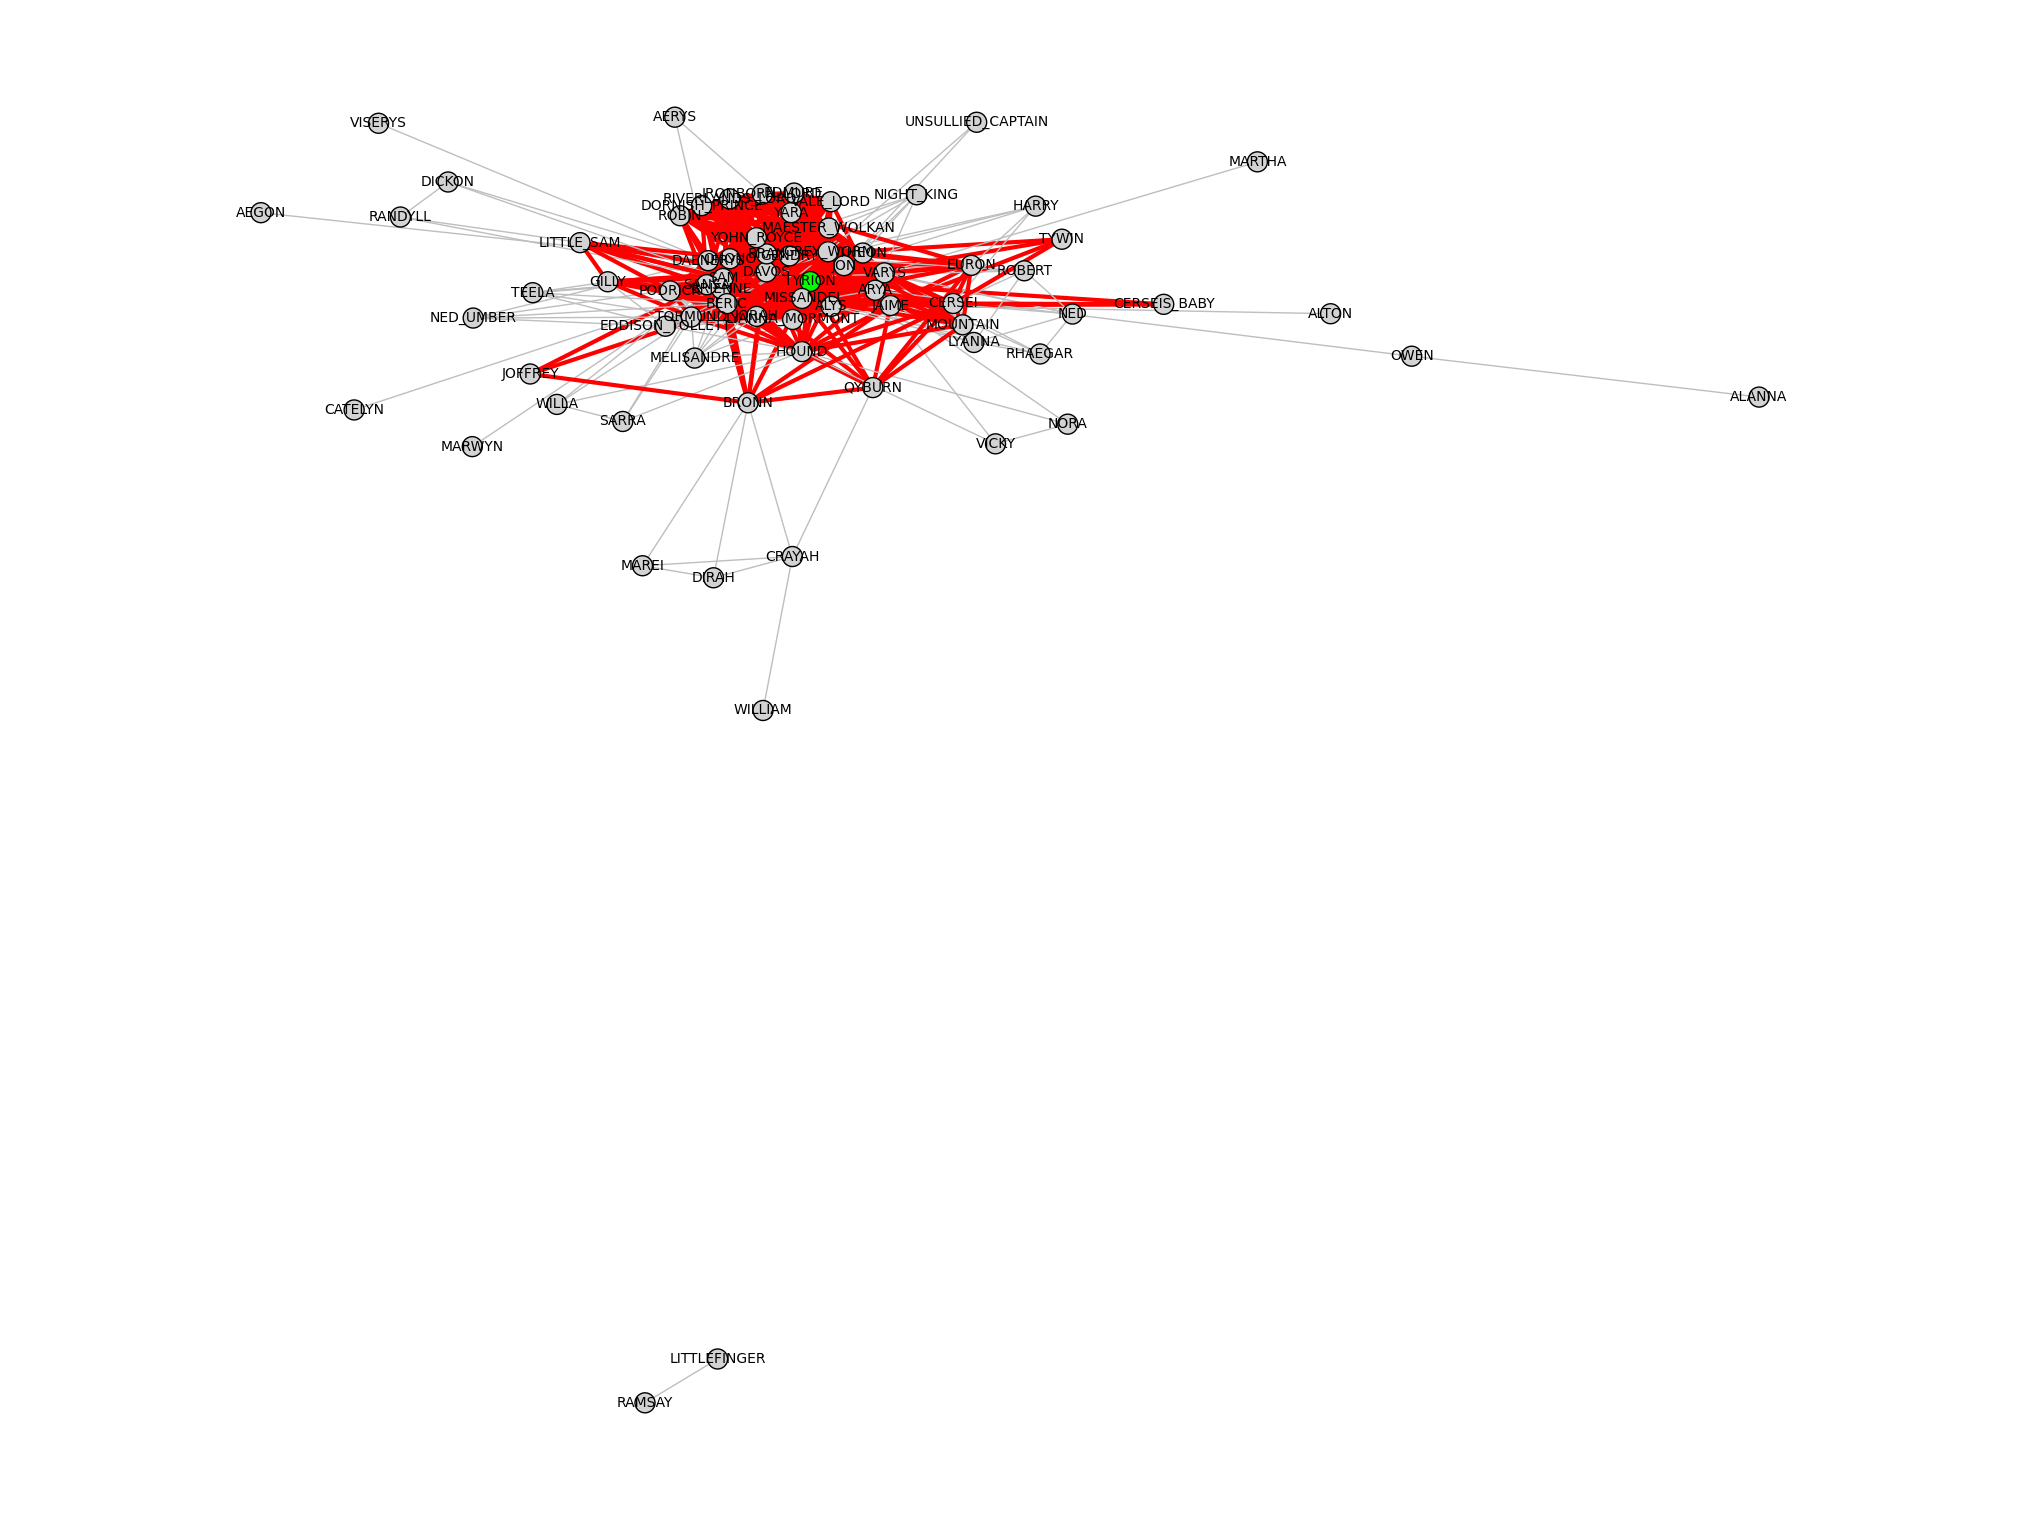

In [43]:
highlight_node = "TYRION"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles


community_graph_layout_gn = nx.spring_layout(G)


node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")


edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)


for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

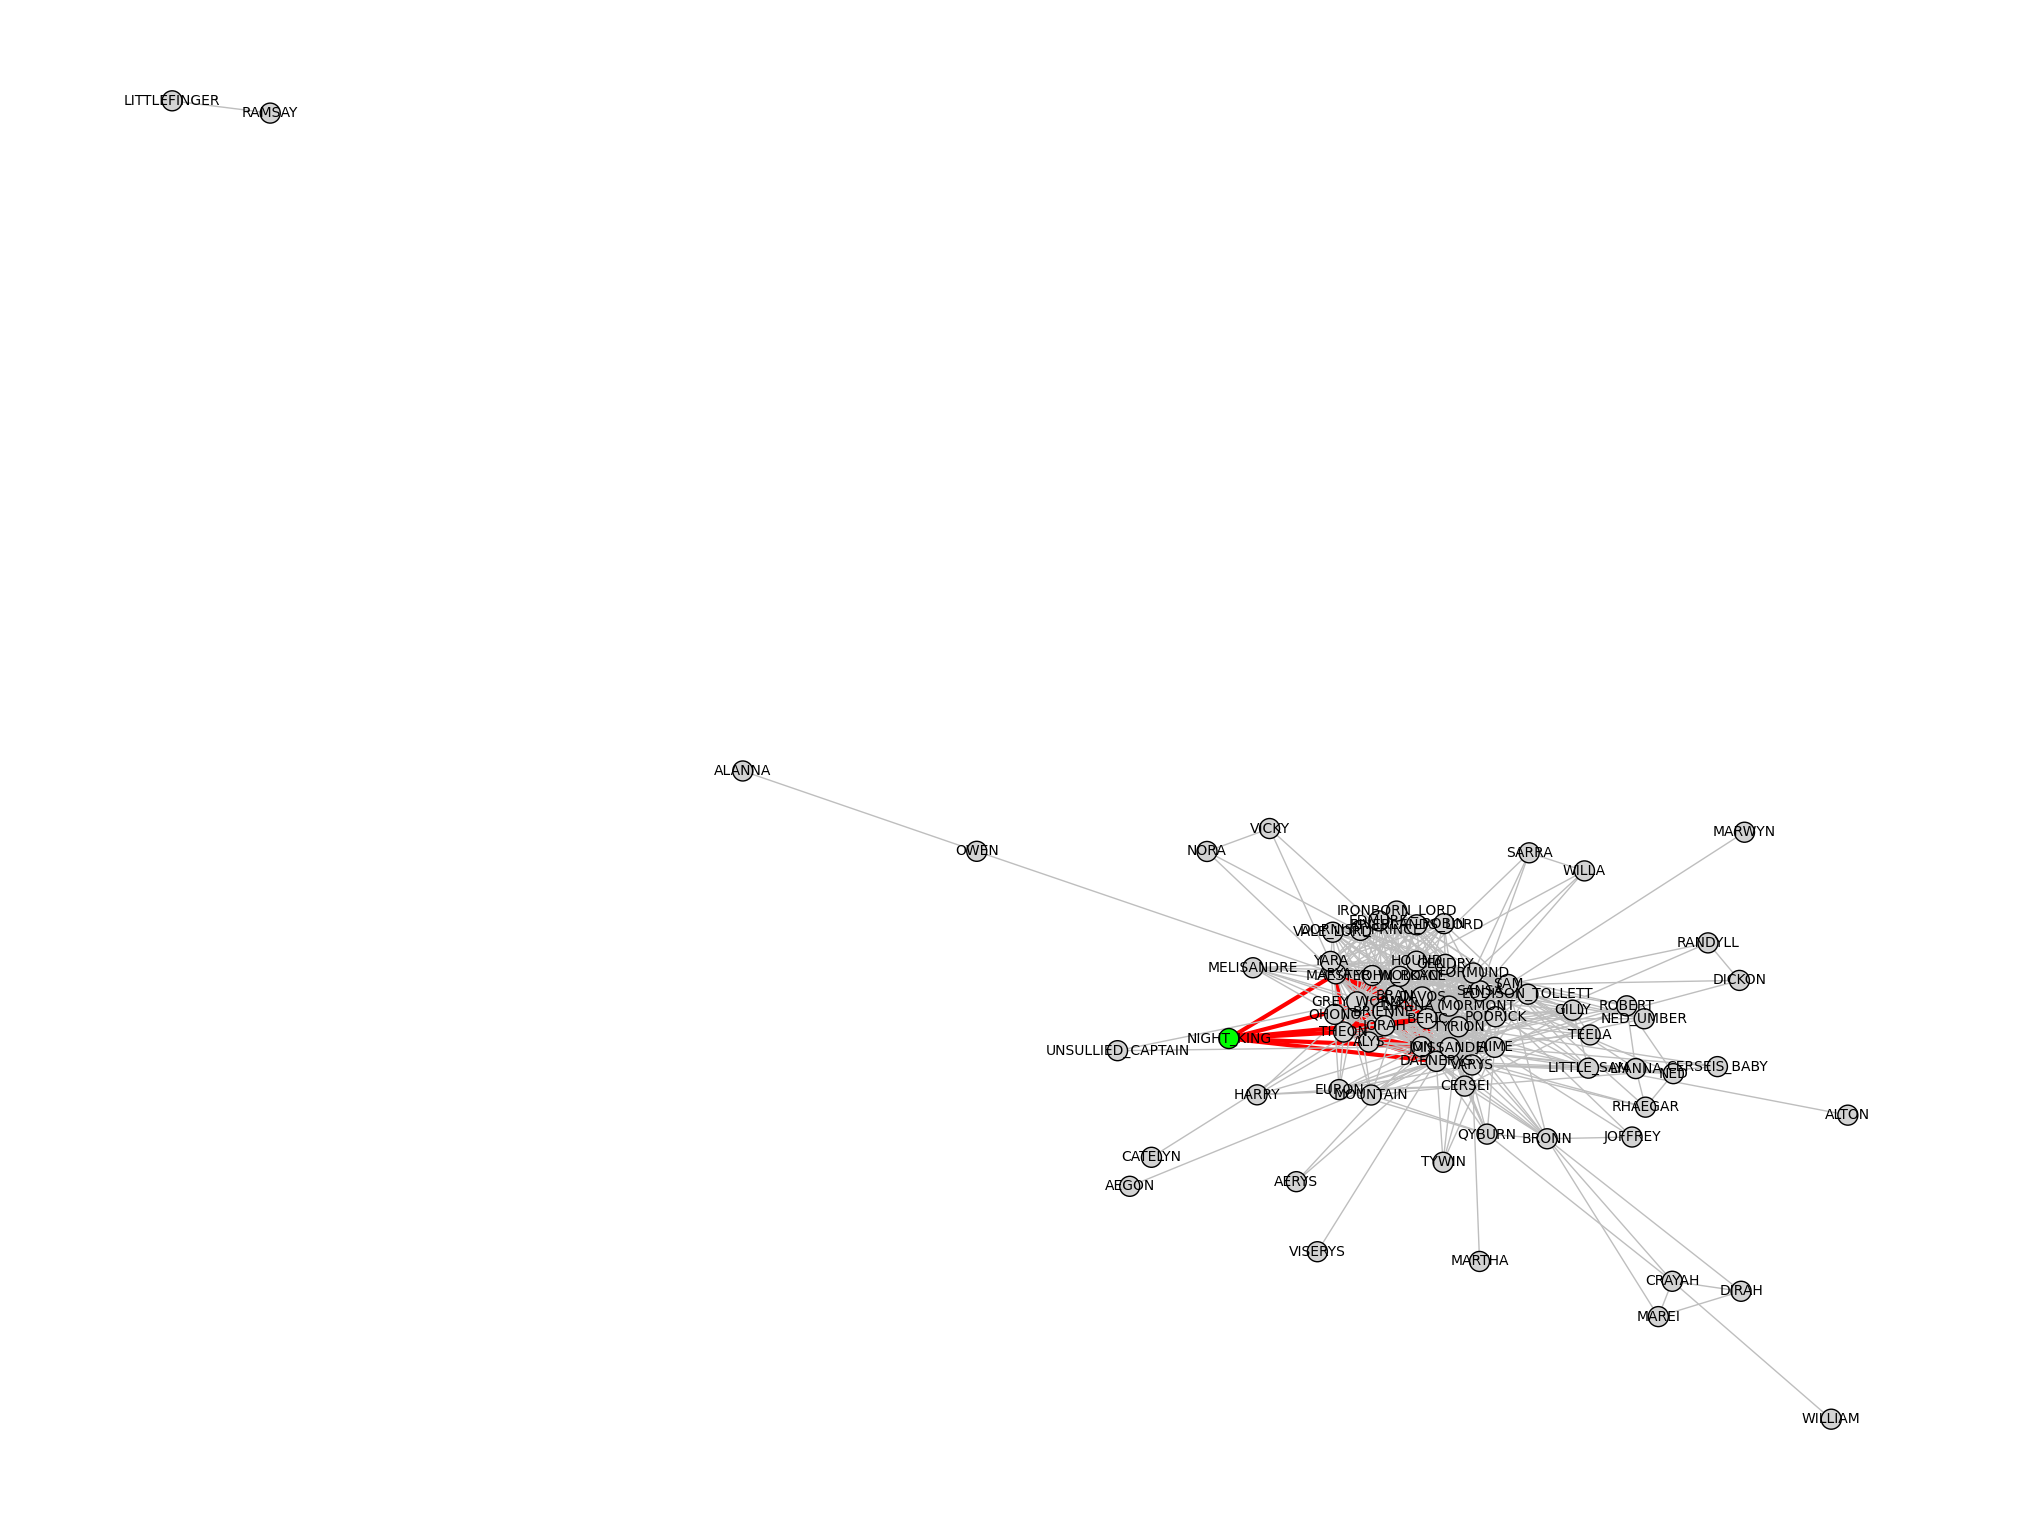

In [44]:
highlight_node = "NIGHT_KING"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles


community_graph_layout_gn = nx.spring_layout(G)


node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")
    else:
        node_colors.append("lightgrey")

edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)


for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()


g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())


fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [45]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

Global clustering coefficient (Triadic Closure) 0.6441837028505615


In [46]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node Daenerys : 0.41707317073170735
   Local clustering coefficient of node Jon : 0.5031746031746032
   Local clustering coefficient of node Tyrion : 0.4963414634146342
   Local clustering coefficient of node Jaime : 0.6068548387096774
   Local clustering coefficient of node Brienne : 0.6506238859180035
   Local clustering coefficient of node Varys : 0.5720430107526882
   Local clustering coefficient of node Sansa : 0.5076923076923077
   Local clustering coefficient of node Davos : 0.5855855855855856
   Local clustering coefficient of node Arya : 0.5263157894736842
   Local clustering coefficient of node Gendry : 0.6988505747126437
   Local clustering coefficient of node Sam : 0.4645760743321719
   Local clustering coefficient of node Sandor : 0.5398550724637681
   Local clustering coefficient of node Bran : 0.6895161290322581
   Local clustering coefficient of node Jorah : 0.8533333333333334
   Local clustering coefficien

In [47]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))


Average clustering component 0.6746808391591189


## Communities

In [48]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "GENDRY"
node2 = "STANNIS"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

There is no edge between 'GENDRY' and 'STANNIS'.


### Infomap

In [49]:
infomap = g.community_infomap()

In [50]:
infomap_comm = infomap.membership

# Create a dictionary to hold clusters
clusters = {}

# Group nodes into clusters based on their community membership
for i, node in enumerate(G.nodes()):
    community = infomap_comm[i]
    if community not in clusters:
        clusters[community] = []
    clusters[community].append(node)

# Convert the clusters dictionary to a list of clusters
infomap_comm = [clusters[community] for community in sorted(clusters)]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

Number of communities detected: 4


In [51]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")


List of Characters by Community
Cluster 1: ['DAENERYS', 'JON', 'TYRION', 'JAIME', 'BRIENNE', 'VARYS', 'SANSA', 'DAVOS', 'ARYA', 'GENDRY', 'SAM', 'HOUND', 'BRAN', 'JORAH', 'GREY_WORM', 'TORMUND', 'CERSEI', 'QYBURN', 'EURON', 'BERIC', 'PODRICK', 'THEON', 'MISSANDEI', 'MOUNTAIN', 'NORA', 'VICKY', 'NIGHT_KING', 'LYANNA_MORMONT', 'EDDISON_TOLLETT', 'YOHN_ROYCE', 'MELISANDRE', 'MAESTER_WOLKAN', 'HARRY', 'GILLY', 'MARTHA', 'LITTLE_SAM', 'LYANNA', 'ALYS', 'YARA', 'NED', 'RHAEGAR', 'QHONO', 'EDMURE', 'ROBERT', 'JOFFREY', 'WILLA', 'TYWIN', 'VISERYS', 'TEELA', 'DORNISH_PRINCE', 'ROBIN', 'NED_UMBER', 'RANDYLL', 'RIVERLANDS_LORD', 'VALE_LORD', 'UNSULLIED_CAPTAIN', 'SARRA', 'IRONBORN_LORD', 'MARWYN', 'AEGON', 'AERYS', 'ALTON', 'CATELYN', 'CERSEIS_BABY', 'DICKON']
Cluster 2: ['BRONN', 'CRAYAH', 'DIRAH', 'MAREI', 'WILLIAM']
Cluster 3: ['OWEN', 'ALANNA']
Cluster 4: ['LITTLEFINGER', 'RAMSAY']


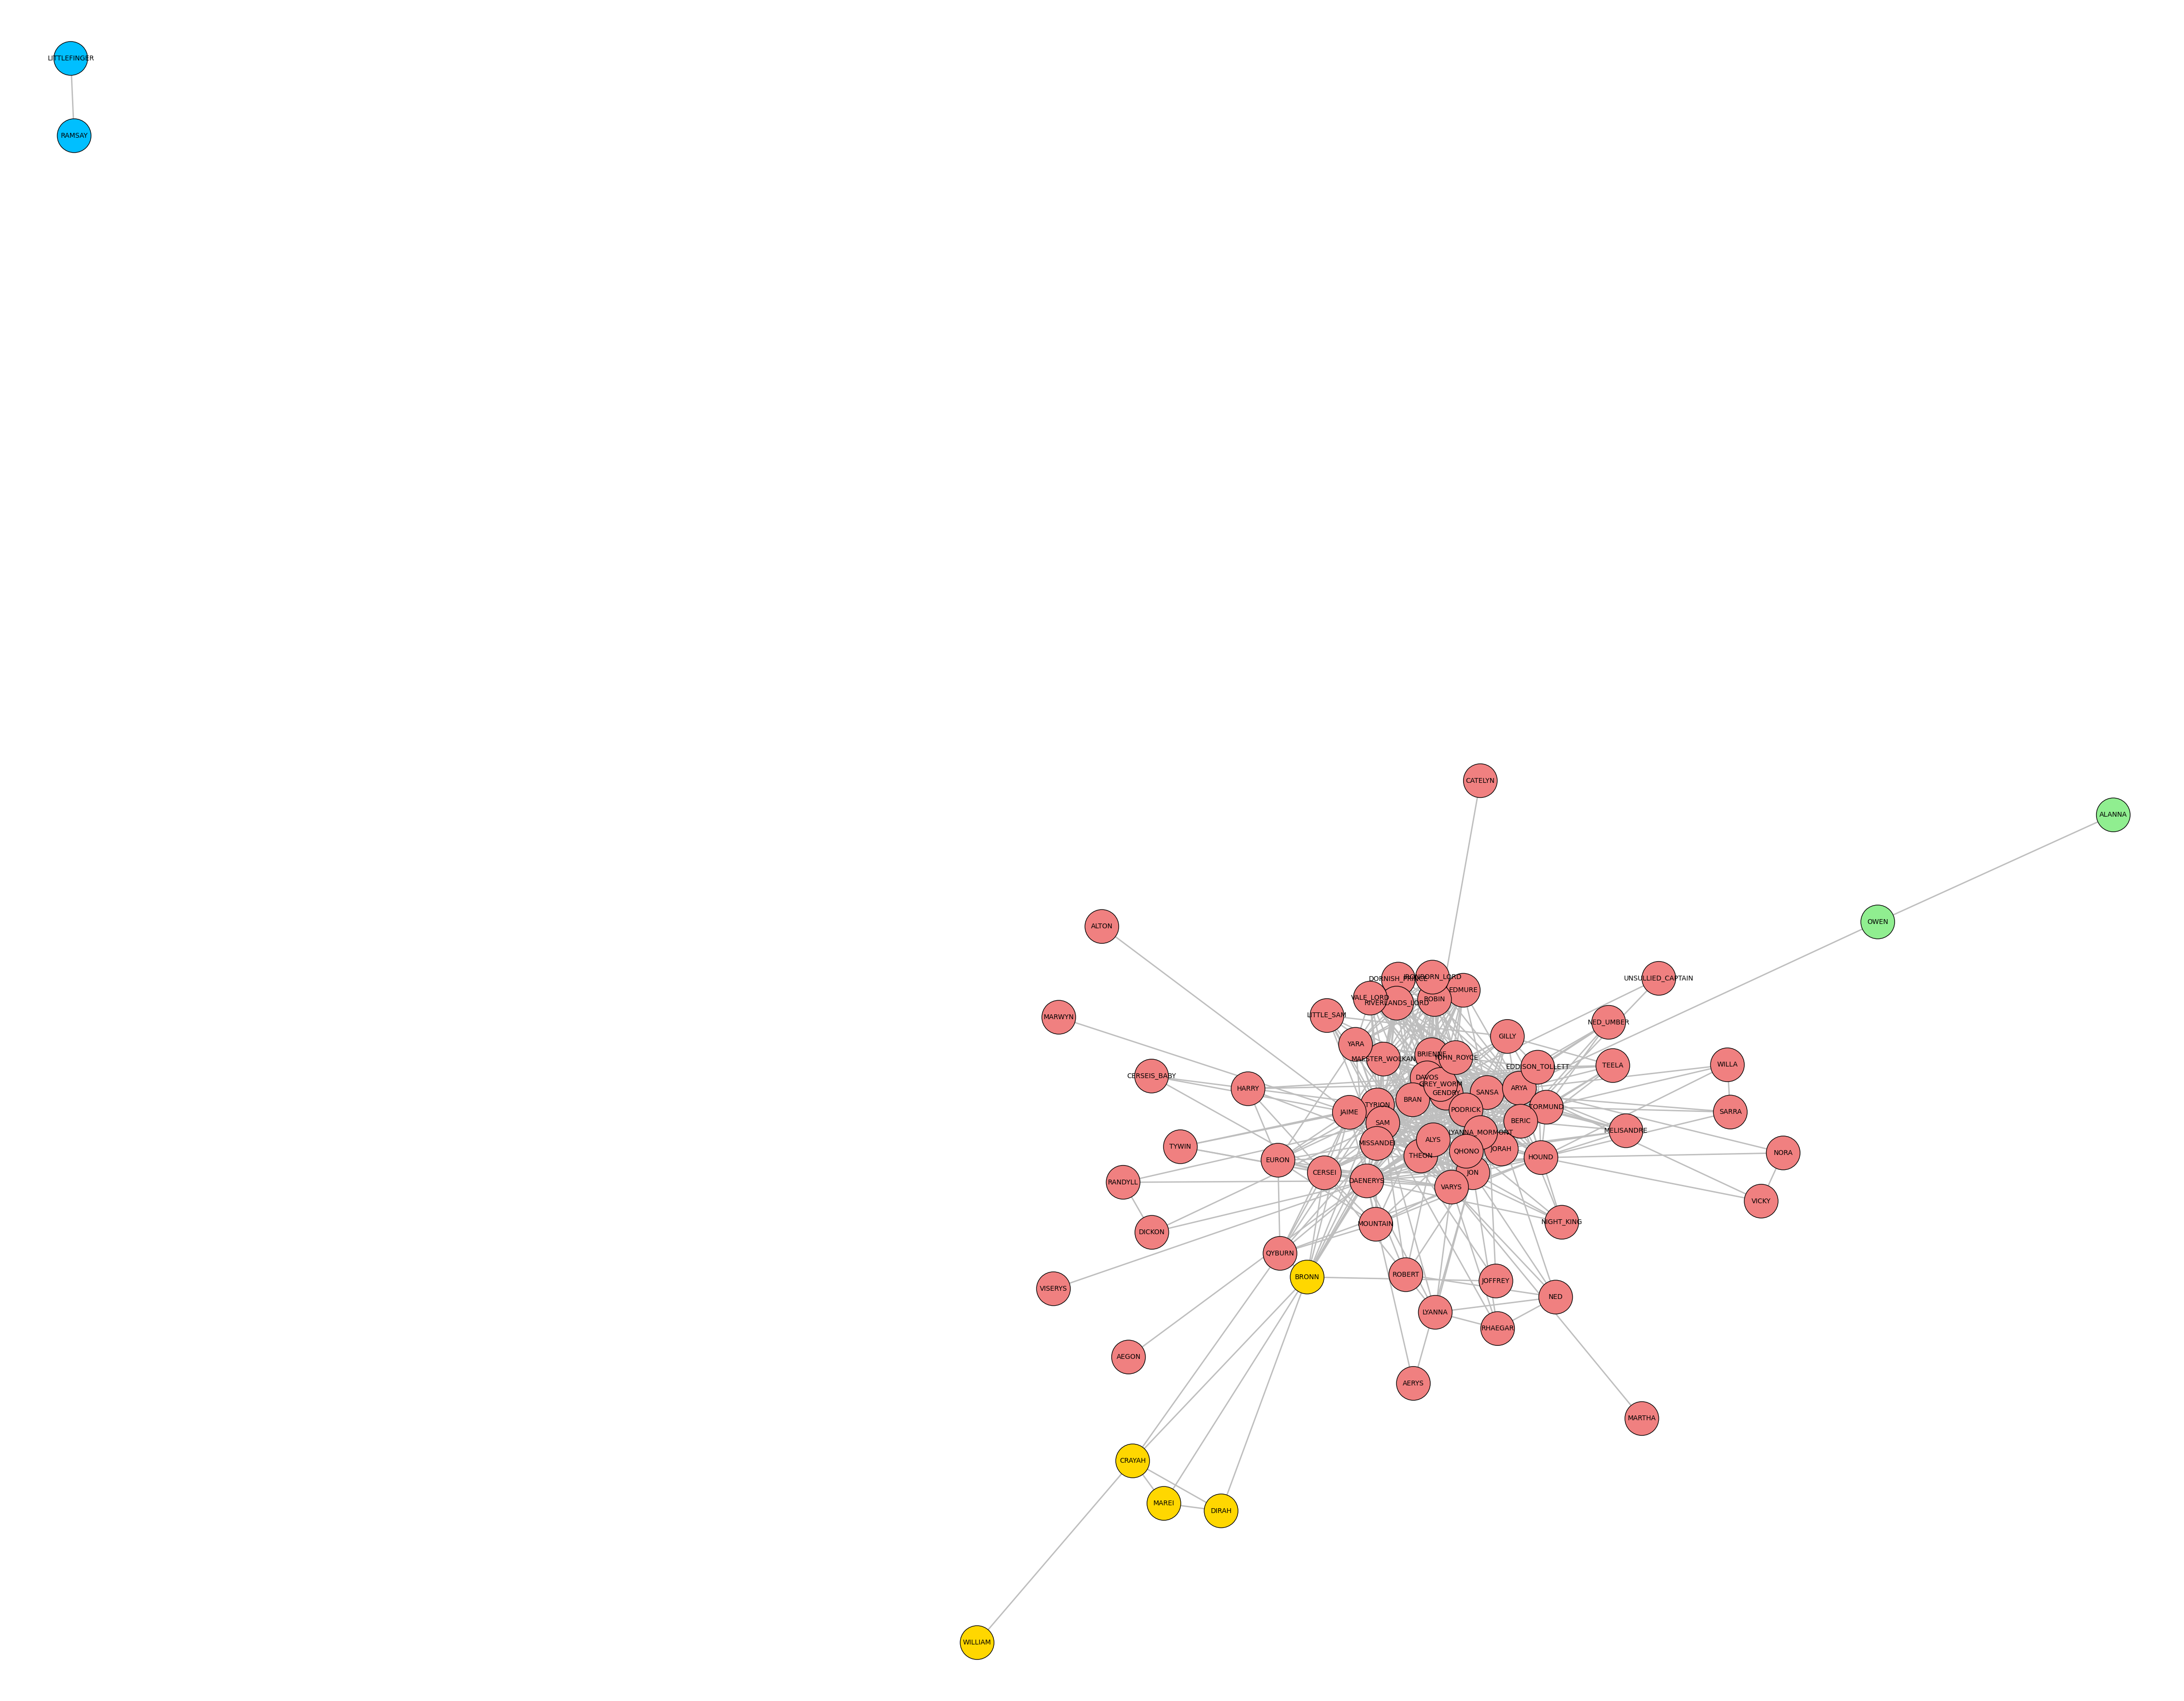

In [52]:
#community_graph_layout_infomap = nx.spring_layout(G, k=2/np.sqrt(len(G.nodes())))
community_graph_layout_infomap = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]


node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_infomap
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]



fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)




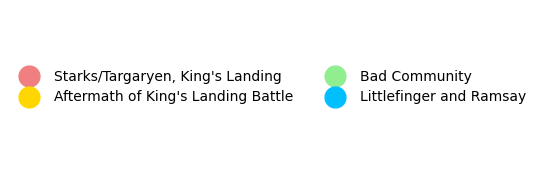

In [53]:
fig_legend, ax_legend = plt.subplots(figsize=(2,2))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen, King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Aftermath of King's Landing Battle")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")



ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [54]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

The Modularity for the Infomap Method is 0.031


### Girvan-Newman

In [55]:
#compute girvan newman communities
from networkx.algorithms import community
com_gn = community.girvan_newman(G)

# To get the communities at different levels
levels = []
desired_number_of_communities = 4 # > 4 does not yield any better detection
for communities in com_gn:
    levels.append(communities)
    if len(communities) >= desired_number_of_communities:
        break

# The last entry in levels contains the desired number of communities
g_n_comm = [sorted(list(c)) for c in levels[-1]]
n_comm_g_n = len(g_n_comm)
print("Number of communities detected:", n_comm_g_n)
print("Communities:", g_n_comm)




Number of communities detected: 4
Communities: [['AEGON', 'AERYS', 'ALTON', 'ALYS', 'ARYA', 'BERIC', 'BRAN', 'BRIENNE', 'BRONN', 'CATELYN', 'CERSEI', 'CERSEIS_BABY', 'DAENERYS', 'DAVOS', 'DICKON', 'DORNISH_PRINCE', 'EDDISON_TOLLETT', 'EDMURE', 'EURON', 'GENDRY', 'GILLY', 'GREY_WORM', 'HARRY', 'HOUND', 'IRONBORN_LORD', 'JAIME', 'JOFFREY', 'JON', 'JORAH', 'LITTLE_SAM', 'LYANNA', 'LYANNA_MORMONT', 'MAESTER_WOLKAN', 'MARTHA', 'MARWYN', 'MELISANDRE', 'MISSANDEI', 'MOUNTAIN', 'NED', 'NED_UMBER', 'NIGHT_KING', 'NORA', 'PODRICK', 'QHONO', 'QYBURN', 'RANDYLL', 'RHAEGAR', 'RIVERLANDS_LORD', 'ROBERT', 'ROBIN', 'SAM', 'SANSA', 'SARRA', 'TEELA', 'THEON', 'TORMUND', 'TYRION', 'TYWIN', 'UNSULLIED_CAPTAIN', 'VALE_LORD', 'VARYS', 'VICKY', 'VISERYS', 'WILLA', 'YARA', 'YOHN_ROYCE'], ['CRAYAH', 'DIRAH', 'MAREI', 'WILLIAM'], ['ALANNA', 'OWEN'], ['LITTLEFINGER', 'RAMSAY']]


In [56]:
# Print each community list
print("List of the characters, divided per communities:")
for idx, community in enumerate(g_n_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: ['AEGON', 'AERYS', 'ALTON', 'ALYS', 'ARYA', 'BERIC', 'BRAN', 'BRIENNE', 'BRONN', 'CATELYN', 'CERSEI', 'CERSEIS_BABY', 'DAENERYS', 'DAVOS', 'DICKON', 'DORNISH_PRINCE', 'EDDISON_TOLLETT', 'EDMURE', 'EURON', 'GENDRY', 'GILLY', 'GREY_WORM', 'HARRY', 'HOUND', 'IRONBORN_LORD', 'JAIME', 'JOFFREY', 'JON', 'JORAH', 'LITTLE_SAM', 'LYANNA', 'LYANNA_MORMONT', 'MAESTER_WOLKAN', 'MARTHA', 'MARWYN', 'MELISANDRE', 'MISSANDEI', 'MOUNTAIN', 'NED', 'NED_UMBER', 'NIGHT_KING', 'NORA', 'PODRICK', 'QHONO', 'QYBURN', 'RANDYLL', 'RHAEGAR', 'RIVERLANDS_LORD', 'ROBERT', 'ROBIN', 'SAM', 'SANSA', 'SARRA', 'TEELA', 'THEON', 'TORMUND', 'TYRION', 'TYWIN', 'UNSULLIED_CAPTAIN', 'VALE_LORD', 'VARYS', 'VICKY', 'VISERYS', 'WILLA', 'YARA', 'YOHN_ROYCE']
Cluster 2: ['CRAYAH', 'DIRAH', 'MAREI', 'WILLIAM']
Cluster 3: ['ALANNA', 'OWEN']
Cluster 4: ['LITTLEFINGER', 'RAMSAY']


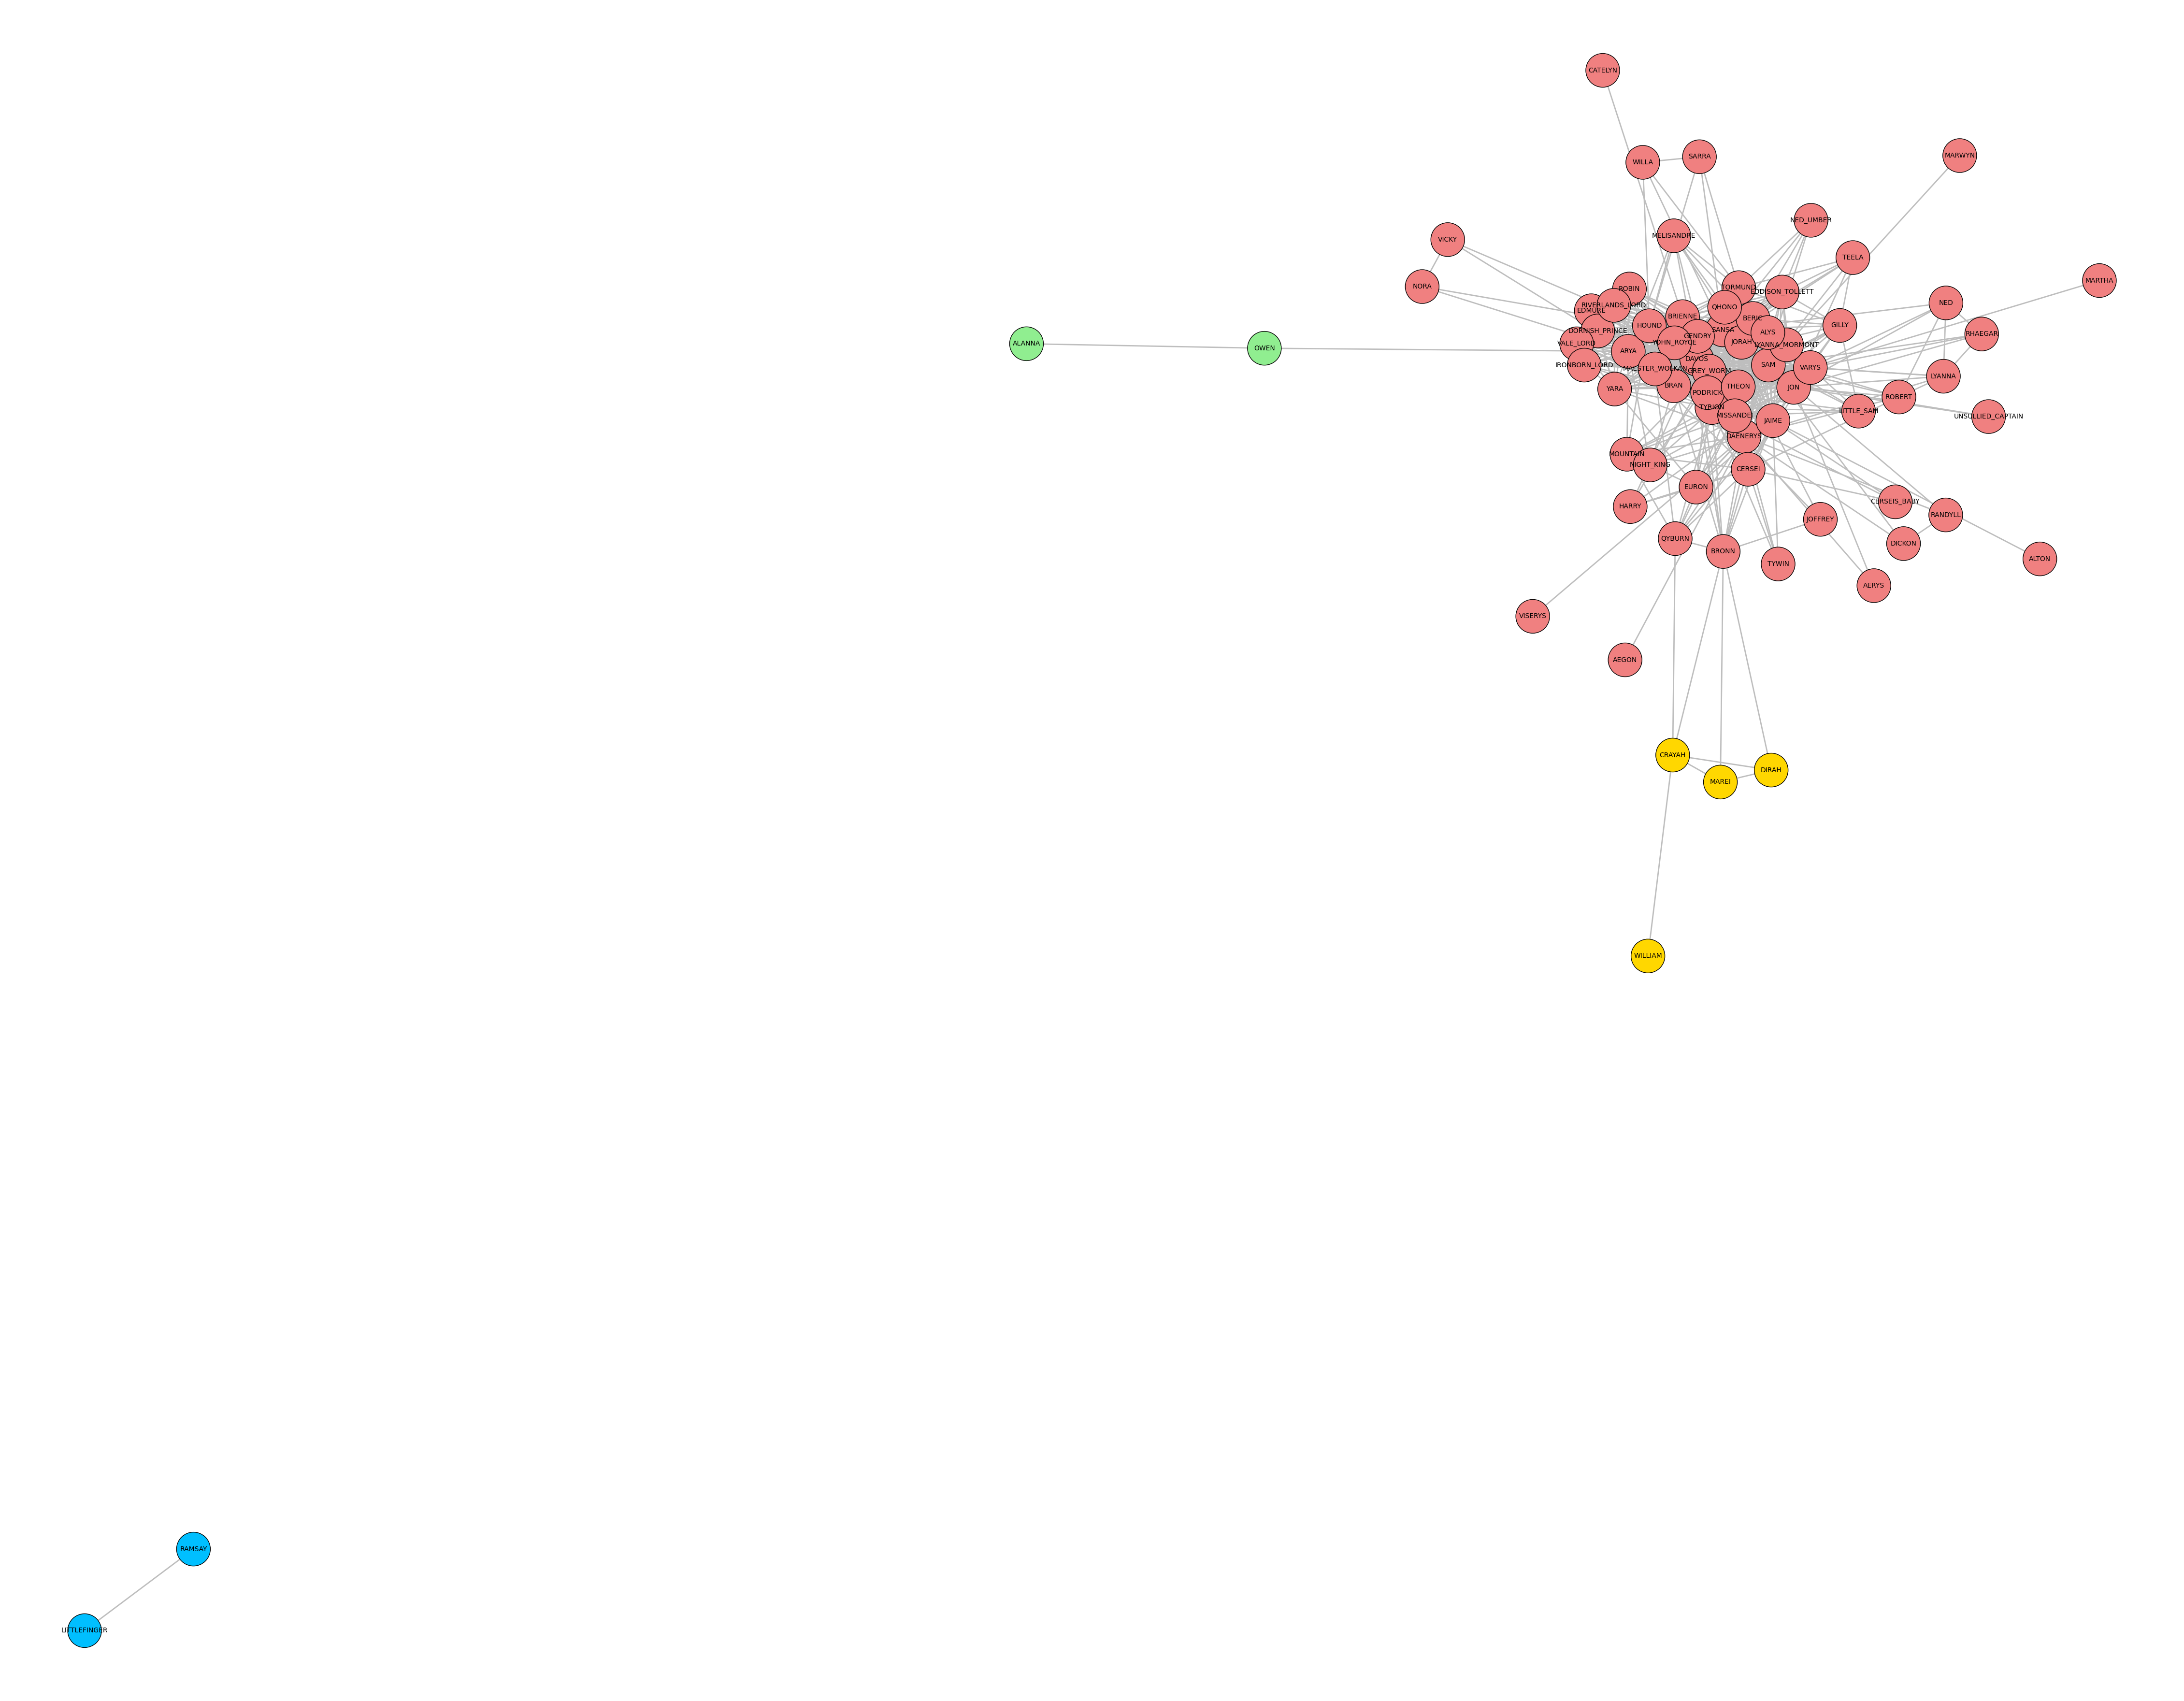

In [57]:
community_graph_layout_gn = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]



fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


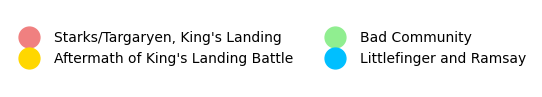

In [58]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen, King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Aftermath of King's Landing Battle")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [59]:
def convertInLabelArray_communities(G, list_of_communities):
    # Initialize the label array with a default value that indicates no community found
    d = []
    num_communities = len(list_of_communities)

    # Create a dictionary to map each node to its community label
    node_to_community = {}
    for community_label, community in enumerate(list_of_communities):
        for node in community:
            node_to_community[node] = community_label

    # Populate the label array based on the node's community
    for node in G.nodes():
        if node in node_to_community:
            d.append(node_to_community[node])
        else:
            d.append(num_communities)  # Assign a label for nodes not in any community

    d = np.array(d)
    return d

In [60]:
#modularity
#modularity = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G, next(com))), 3)

modularity_g_n = round(nx.community.modularity(G, next(com_gn)),3)

print("The Modularity for the Girvan-Newman Nethod is", modularity_g_n)

The Modularity for the Girvan-Newman Nethod is 0.021


### Louvain

In [61]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

Number of communities detected: 5


In [62]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

List of the characters, divided per communities:
Community 1: {'JOFFREY', 'CERSEI', 'WILLIAM', 'JAIME', 'BRONN', 'ALTON', 'MOUNTAIN', 'TYWIN', 'VARYS', 'CRAYAH', 'CERSEIS_BABY', 'DIRAH', 'LITTLE_SAM', 'MAREI', 'EURON', 'HARRY', 'TYRION', 'QYBURN', 'MISSANDEI', 'MARTHA'}
Community 2: {'WILLA', 'HOUND', 'NORA', 'ARYA', 'PODRICK', 'ALYS', 'LYANNA_MORMONT', 'TEELA', 'MELISANDRE', 'NED_UMBER', 'THEON', 'SANSA', 'OWEN', 'NIGHT_KING', 'TORMUND', 'QHONO', 'VICKY', 'GILLY', 'EDDISON_TOLLETT', 'BERIC', 'ALANNA', 'SARRA', 'JORAH'}
Community 3: {'RANDYLL', 'AERYS', 'DAENERYS', 'AEGON', 'DICKON', 'VISERYS', 'RHAEGAR', 'UNSULLIED_CAPTAIN', 'JON', 'NED', 'LYANNA', 'ROBERT'}
Community 4: {'MARWYN', 'VALE_LORD', 'BRIENNE', 'SAM', 'EDMURE', 'YARA', 'CATELYN', 'DAVOS', 'MAESTER_WOLKAN', 'DORNISH_PRINCE', 'ROBIN', 'BRAN', 'RIVERLANDS_LORD', 'GREY_WORM', 'IRONBORN_LORD', 'GENDRY', 'YOHN_ROYCE'}
Community 5: {'LITTLEFINGER', 'RAMSAY'}


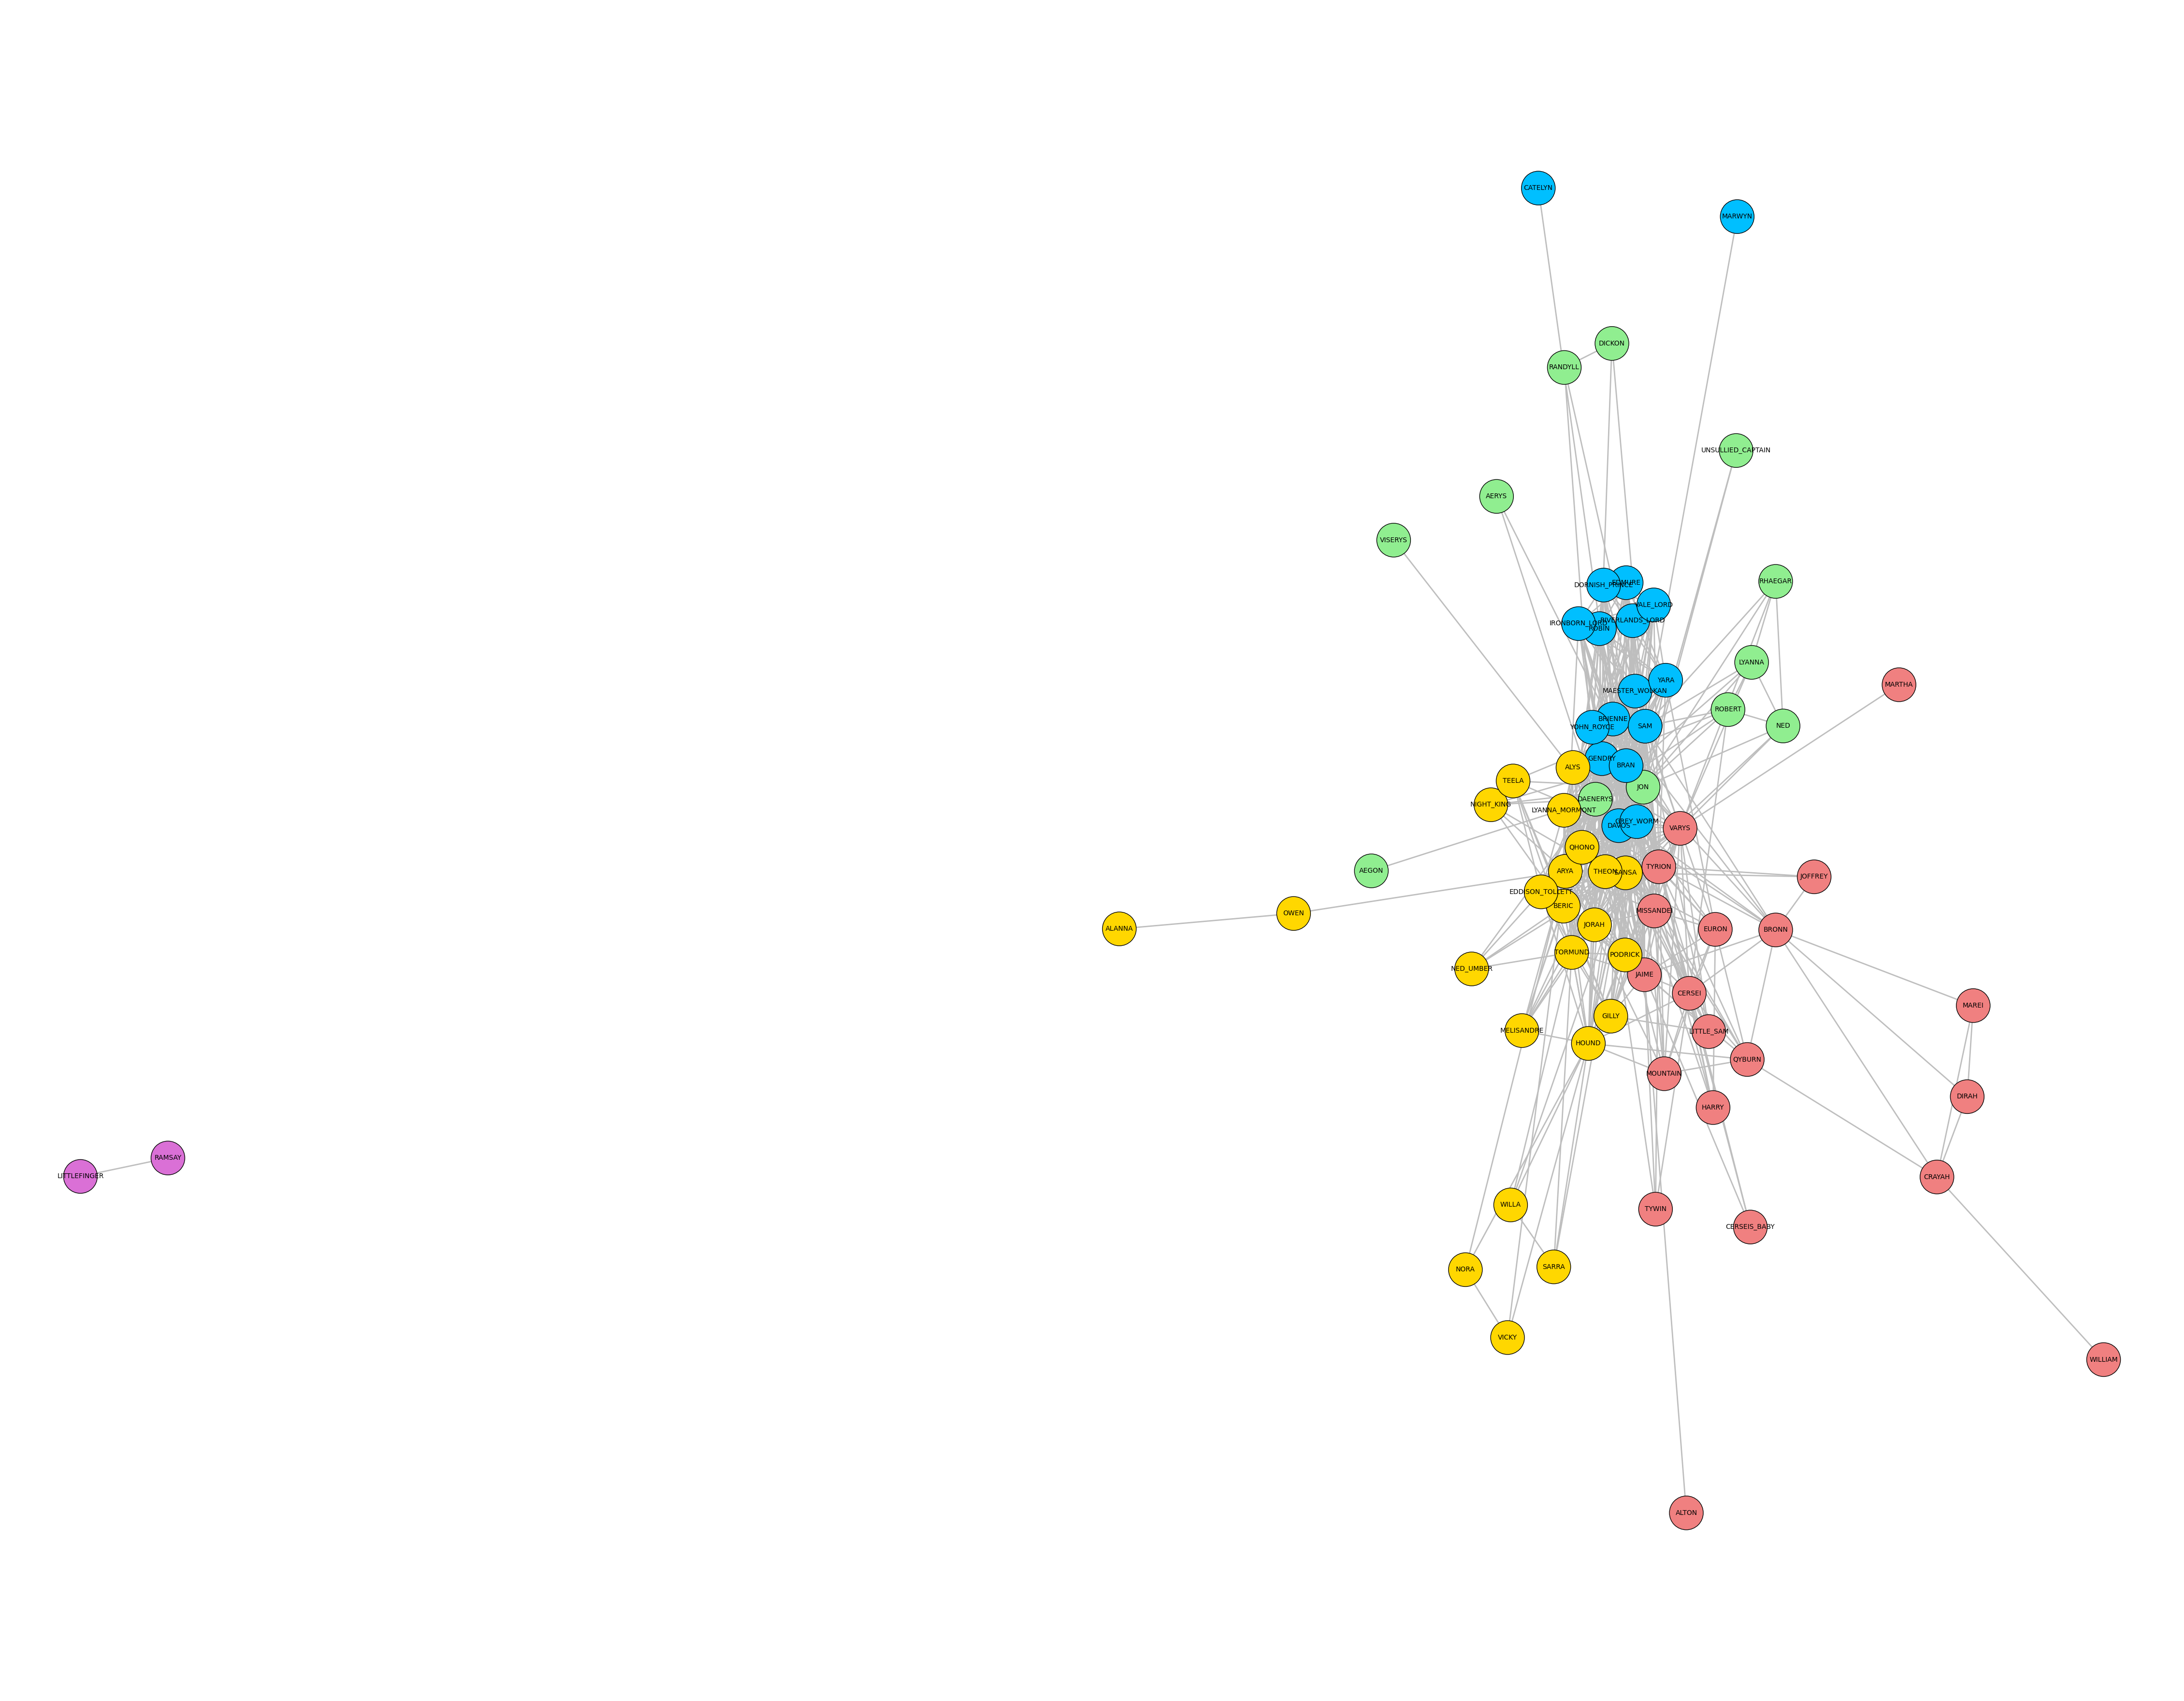

In [63]:
community_graph_layout_louvain = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(louvain_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break


positions = community_graph_layout_louvain
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


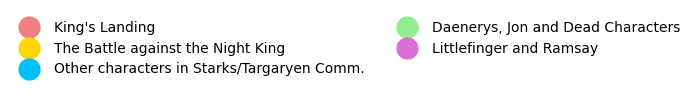

In [64]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Battle against the Night King")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Other characters in Starks/Targaryen Comm.")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys, Jon and Dead Characters")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [65]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

The Modularity for the Louvain Method is 0.201


### Greedy Modularity Maximization

In [66]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

The number of communities detected are: 6


In [67]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: frozenset({'MARWYN', 'JOFFREY', 'CERSEI', 'SAM', 'DAENERYS', 'JAIME', 'BRONN', 'ALTON', 'NED', 'MOUNTAIN', 'TYWIN', 'VARYS', 'PODRICK', 'CERSEIS_BABY', 'LITTLE_SAM', 'RANDYLL', 'AERYS', 'AEGON', 'EURON', 'DICKON', 'HARRY', 'VISERYS', 'TYRION', 'RHAEGAR', 'GILLY', 'JON', 'QYBURN', 'MISSANDEI', 'LYANNA', 'MARTHA', 'ROBERT'})
Cluster 2: frozenset({'WILLA', 'BRIENNE', 'HOUND', 'NORA', 'CATELYN', 'DAVOS', 'ARYA', 'ALYS', 'LYANNA_MORMONT', 'TEELA', 'MELISANDRE', 'NED_UMBER', 'THEON', 'SANSA', 'TORMUND', 'GENDRY', 'QHONO', 'VICKY', 'YOHN_ROYCE', 'EDDISON_TOLLETT', 'BERIC', 'SARRA', 'JORAH'})
Cluster 3: frozenset({'GREY_WORM', 'VALE_LORD', 'IRONBORN_LORD', 'EDMURE', 'YARA', 'NIGHT_KING', 'MAESTER_WOLKAN', 'UNSULLIED_CAPTAIN', 'DORNISH_PRINCE', 'ROBIN', 'BRAN', 'RIVERLANDS_LORD'})
Cluster 4: frozenset({'MAREI', 'CRAYAH', 'WILLIAM', 'DIRAH'})
Cluster 5: frozenset({'ALANNA', 'OWEN'})
Cluster 6: frozenset({'LITTLEFINGER', 'RAMSAY'})


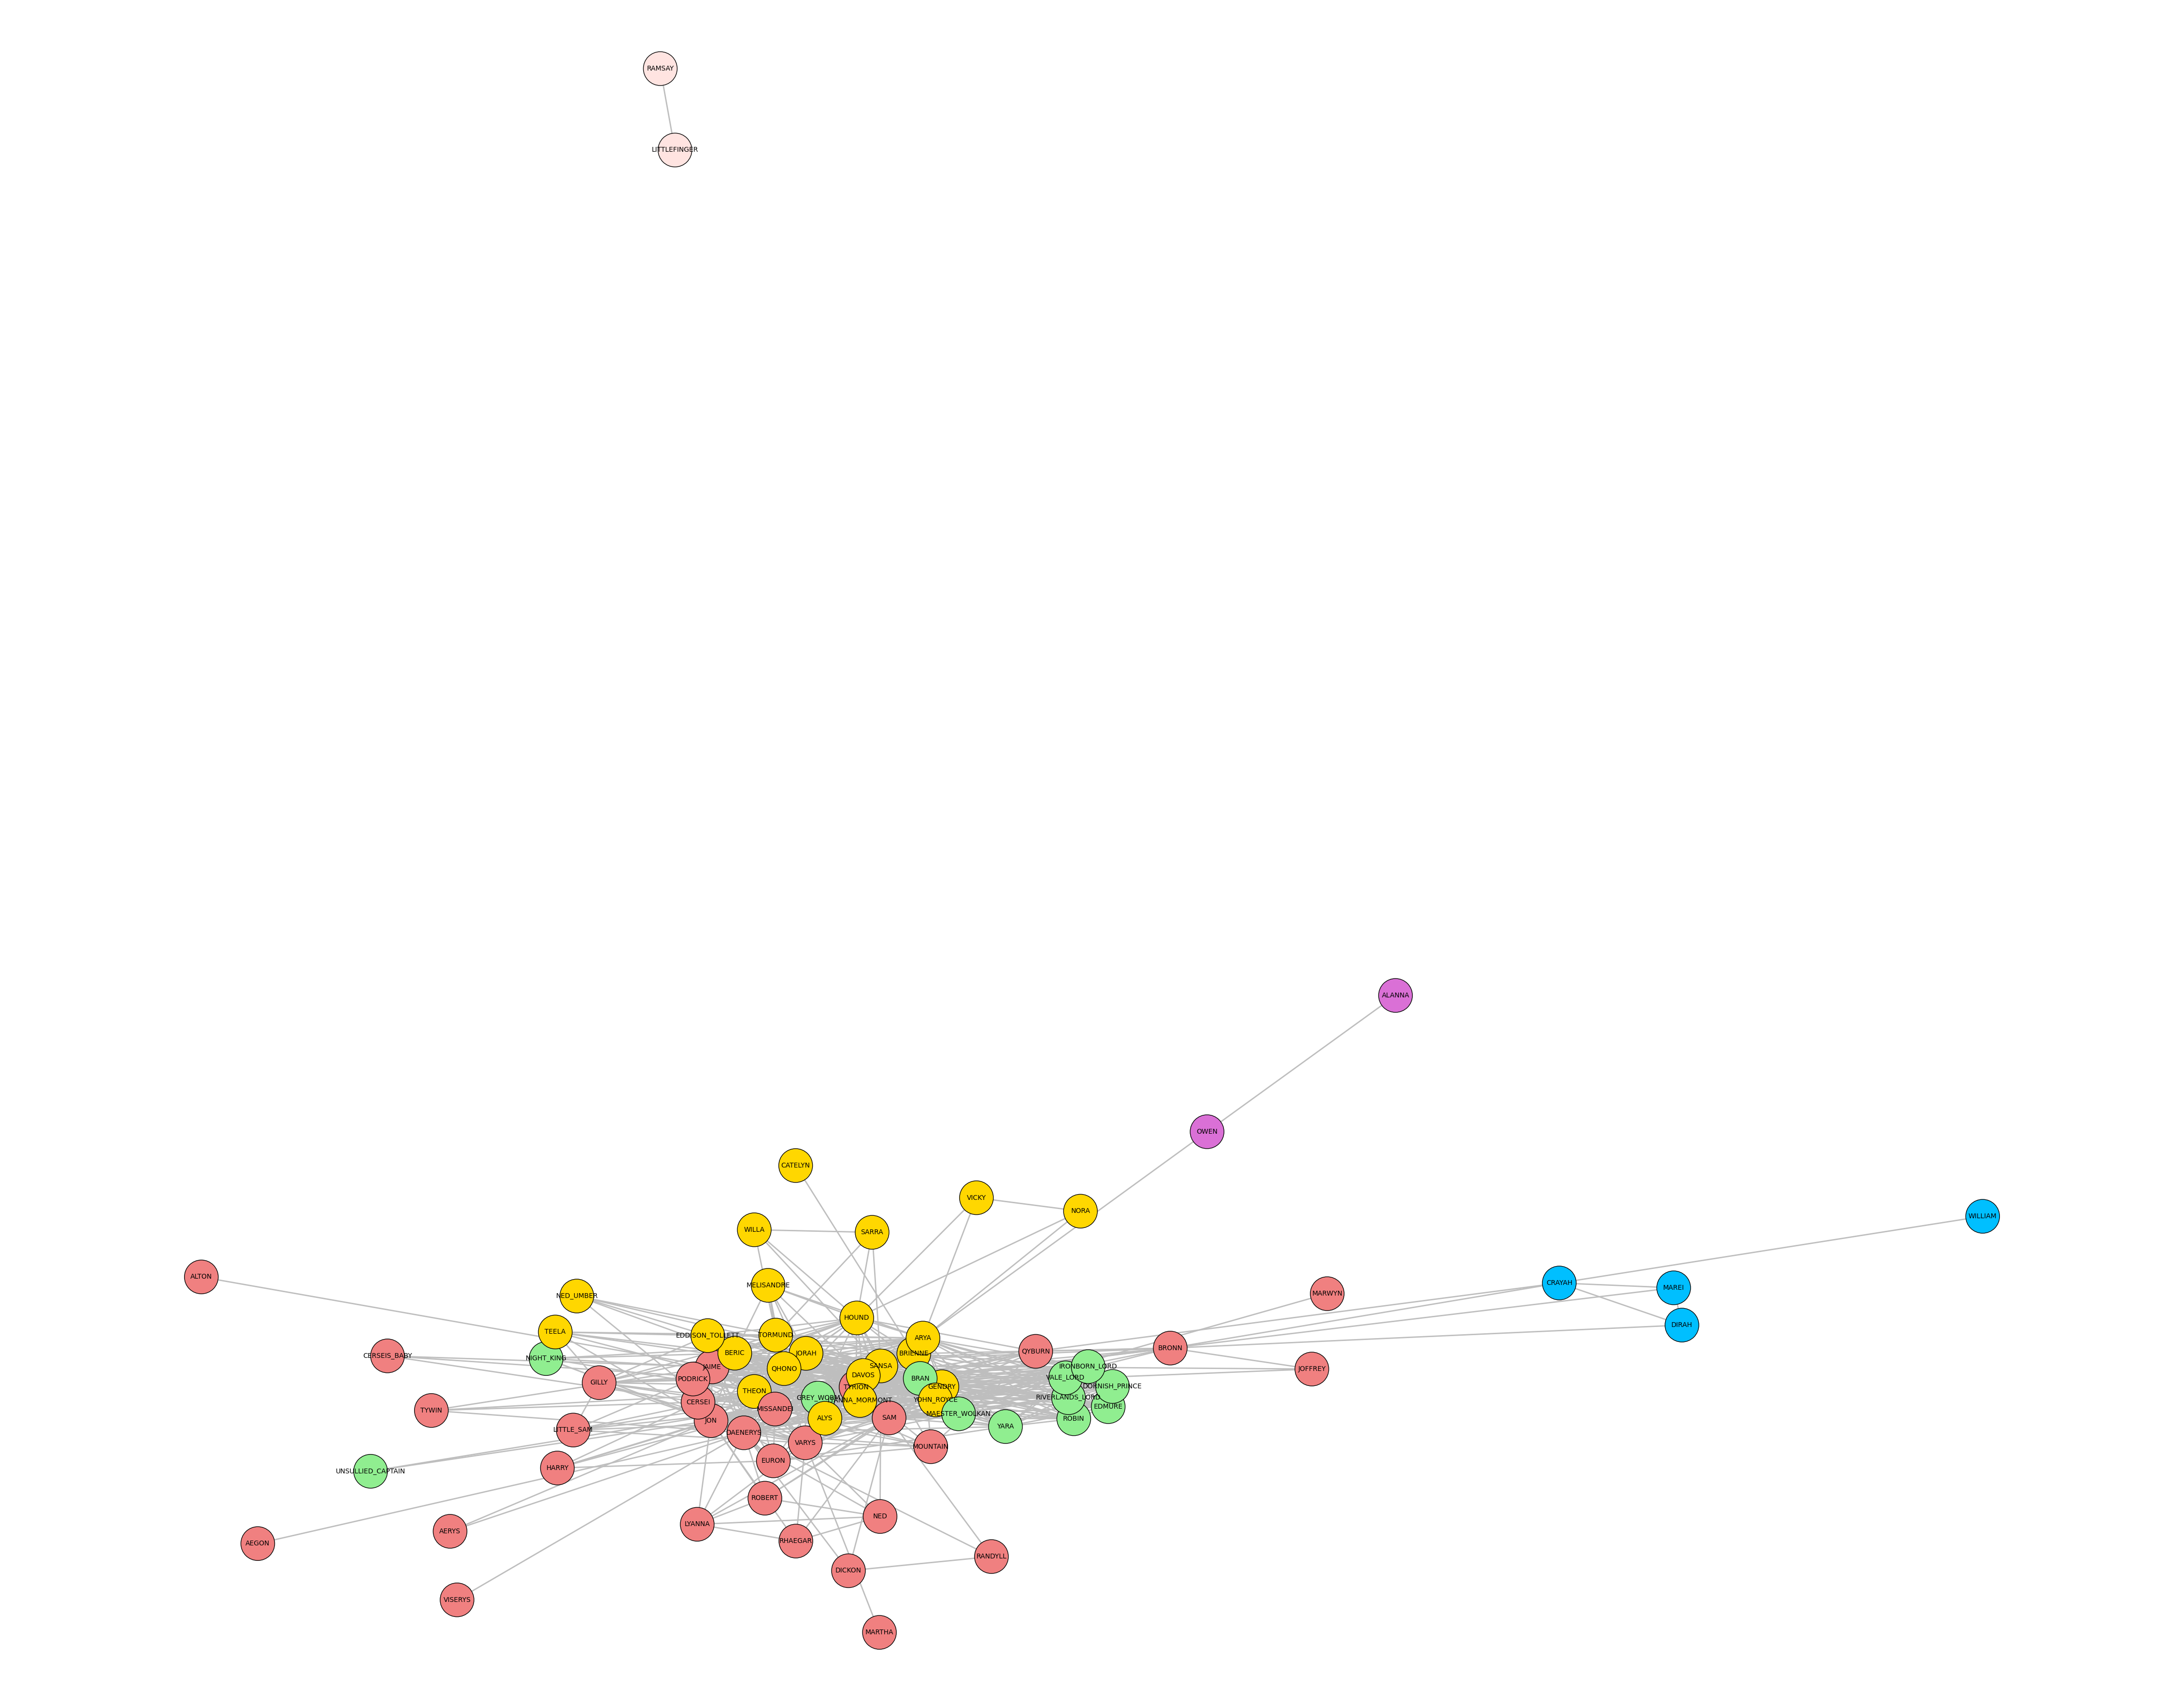

In [68]:
community_graph_layout_gmm = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


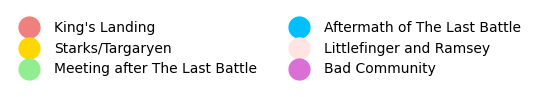

In [69]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Meeting after The Last Battle")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Aftermath of The Last Battle")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsey")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Bad Community")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [70]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

The modularity for Greedy Modularity Maximization is 0.175


### Spectral Clustering

In [71]:
from sklearn.cluster import SpectralClustering

adj_matrix = nx.to_numpy_array(G)

num_clusters = 4  # Specify the number of communities
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=30)
labels = spectral_clustering.fit_predict(adj_matrix)

community_dict = {node: labels[i] for i, node in enumerate(G.nodes())}
sc_comm = [[] for _ in range(num_clusters)]
for node, comm in community_dict.items():
  sc_comm[comm].append(node)

n_comm_sc = len(sc_comm)

print(f"Spectral Clustering detected {n_comm_sc} communities")
print("List of the characters, divided per communities:")
for idx, community in enumerate(sc_comm):
    print(f"Cluster {idx + 1}: {community}")

Spectral Clustering detected 4 communities
List of the characters, divided per communities:
Cluster 1: ['DAENERYS', 'JON', 'TYRION', 'JAIME', 'BRIENNE', 'VARYS', 'SANSA', 'DAVOS', 'ARYA', 'GENDRY', 'SAM', 'HOUND', 'BRAN', 'JORAH', 'GREY_WORM', 'TORMUND', 'CERSEI', 'QYBURN', 'BRONN', 'EURON', 'BERIC', 'PODRICK', 'THEON', 'MISSANDEI', 'MOUNTAIN', 'NORA', 'VICKY', 'NIGHT_KING', 'LYANNA_MORMONT', 'EDDISON_TOLLETT', 'YOHN_ROYCE', 'MELISANDRE', 'MAESTER_WOLKAN', 'HARRY', 'GILLY', 'MARTHA', 'LITTLE_SAM', 'LYANNA', 'ALYS', 'YARA', 'NED', 'RHAEGAR', 'QHONO', 'EDMURE', 'ROBERT', 'JOFFREY', 'WILLA', 'TYWIN', 'VISERYS', 'TEELA', 'DORNISH_PRINCE', 'ROBIN', 'NED_UMBER', 'RANDYLL', 'RIVERLANDS_LORD', 'VALE_LORD', 'UNSULLIED_CAPTAIN', 'SARRA', 'IRONBORN_LORD', 'MARWYN', 'AEGON', 'AERYS', 'ALTON', 'CATELYN', 'CERSEIS_BABY', 'DICKON']
Cluster 2: ['LITTLEFINGER', 'RAMSAY']
Cluster 3: ['OWEN', 'ALANNA']
Cluster 4: ['CRAYAH', 'DIRAH', 'MAREI', 'WILLIAM']


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


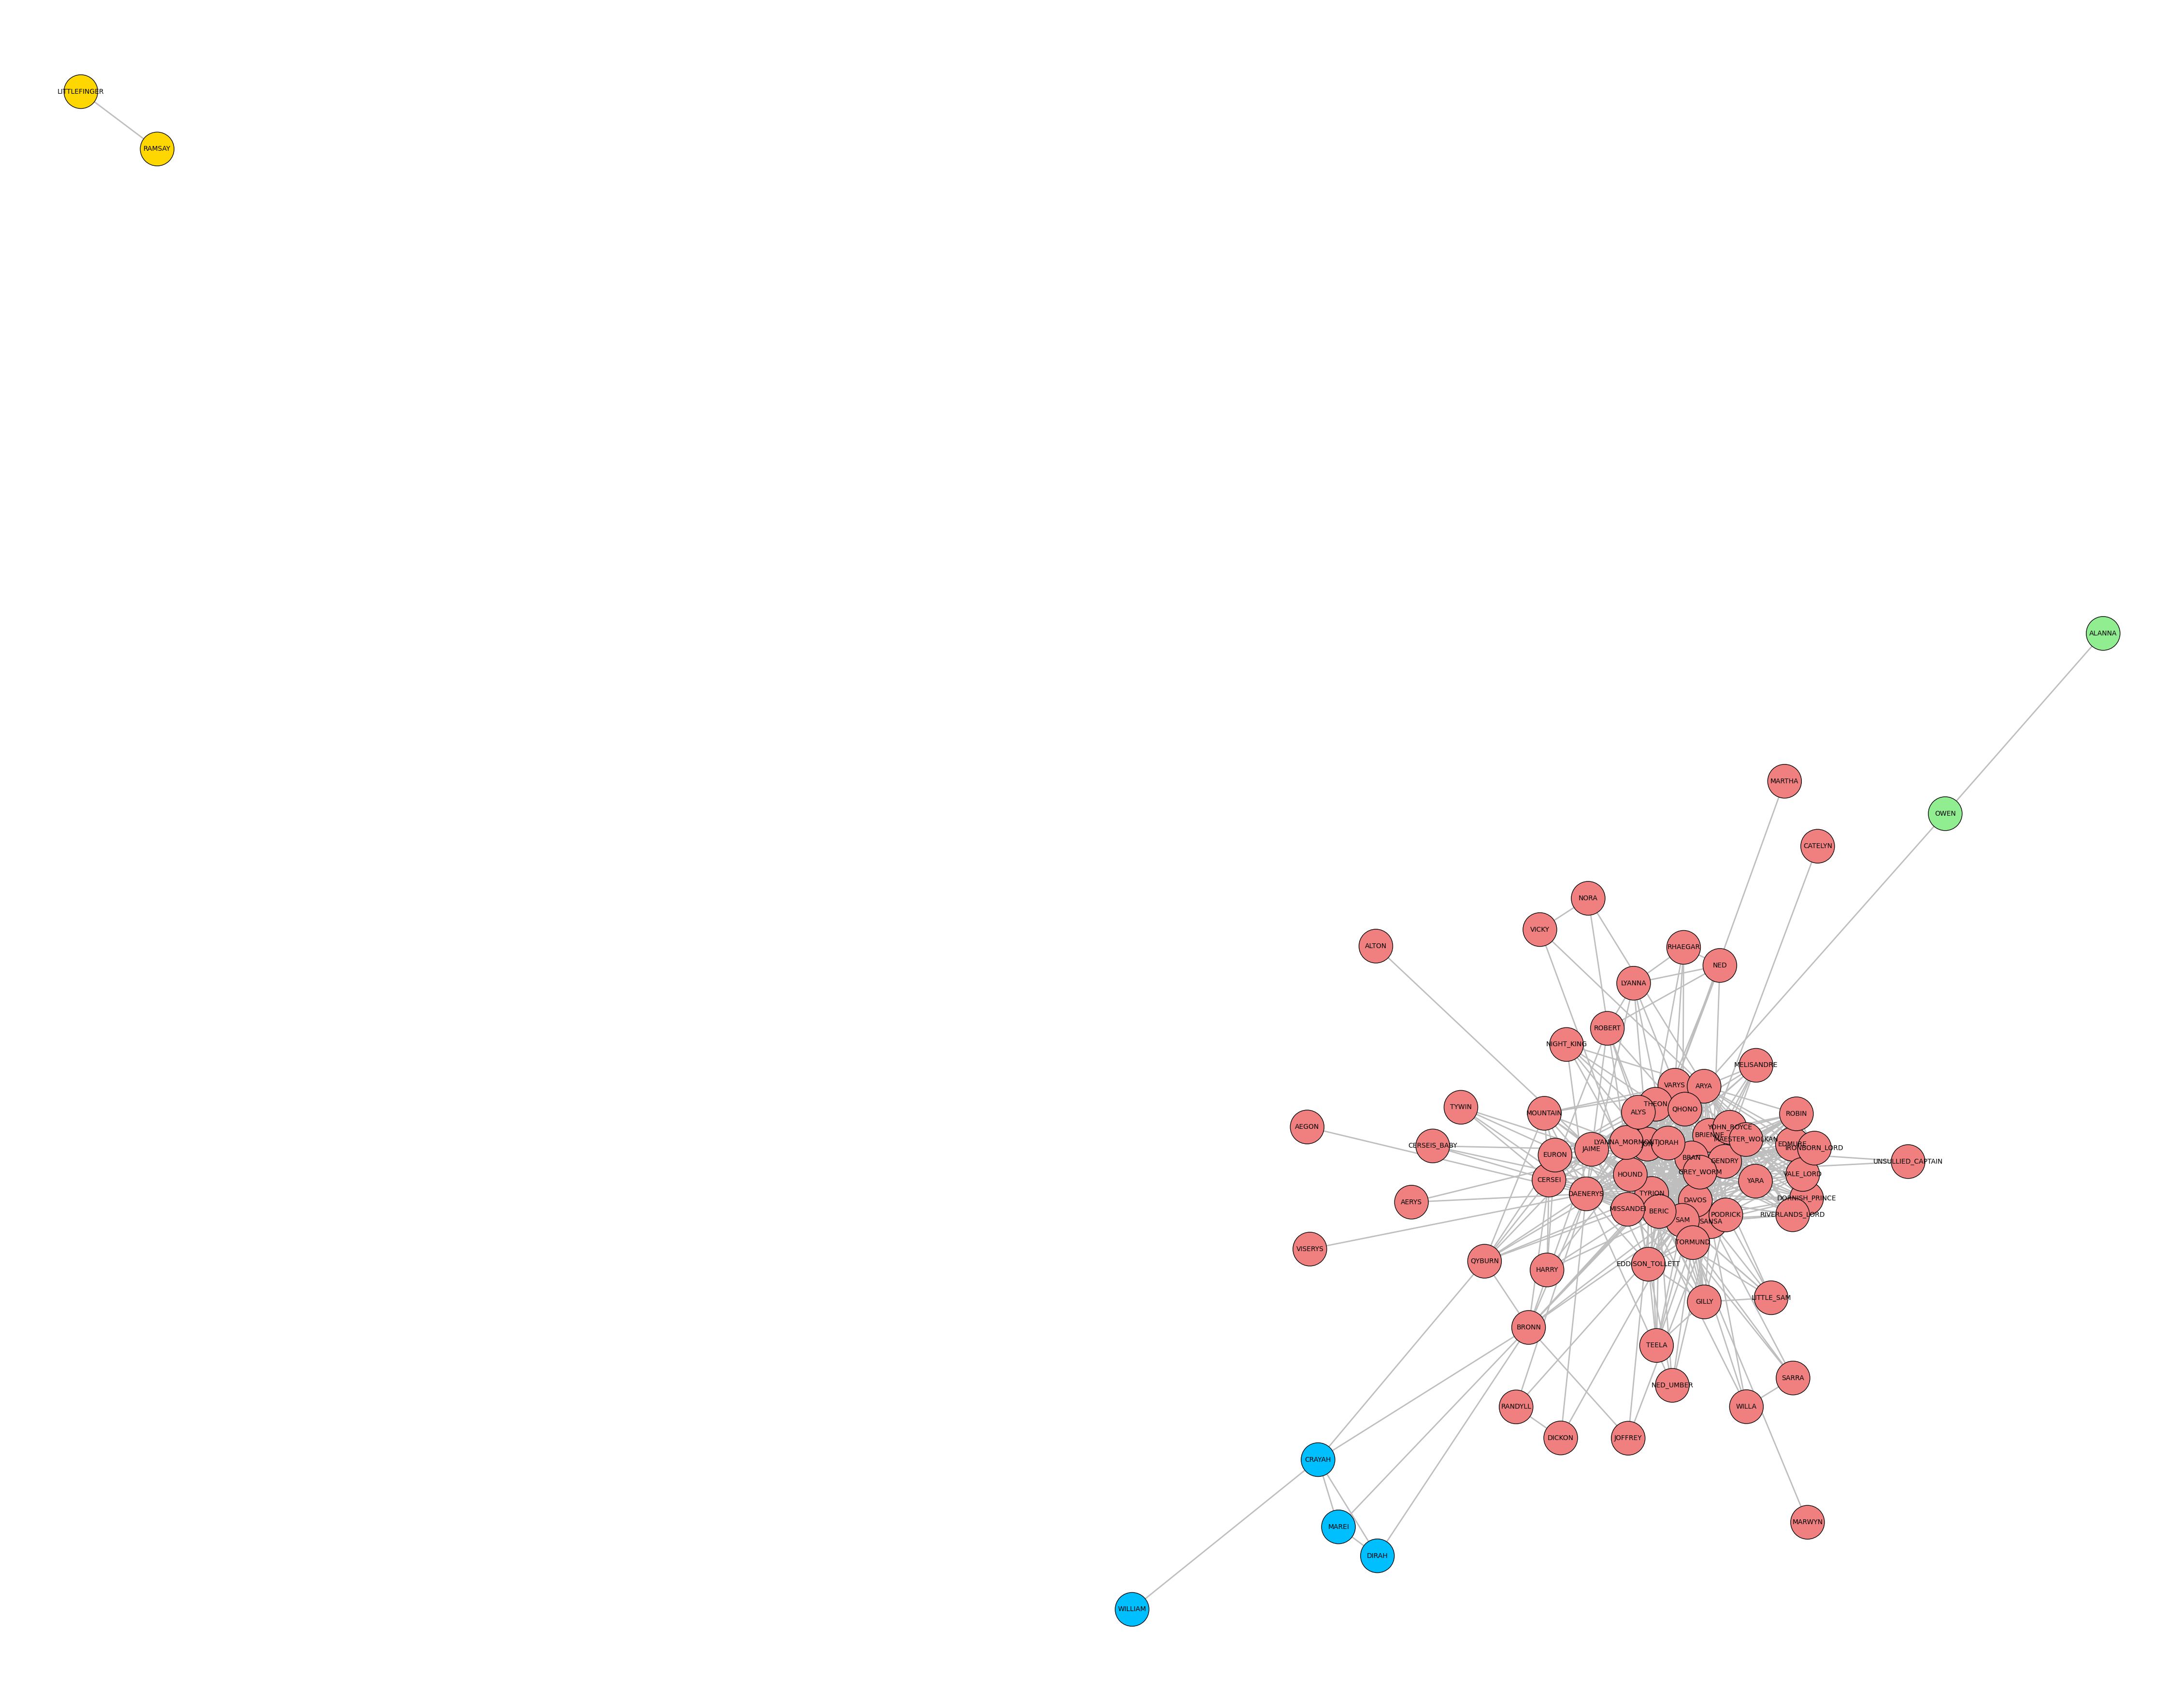

In [72]:
community_graph_layout = nx.spring_layout(G)


colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(sc_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

ig_G = ig.Graph.Weighted_Adjacency(adj_matrix.tolist(), mode=ig.ADJ_UNDIRECTED)
ig_G.vs["Label"] = list(G.nodes())

positions = community_graph_layout
ig_G.vs["x"] = [positions[node][0] for node in G.nodes()]
ig_G.vs["y"] = [positions[node][1] for node in G.nodes()]


fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(ig_G.vs["x"])-0.05, max(ig_G.vs["x"])+0.05)
ax.set_ylim(min(ig_G.vs["y"])-0.05, max(ig_G.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    ig_G,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=ig_G.vs["Label"],
    vertex_label_size=10,
    edge_color="grey",
    edge_width=[weight * 2 for weight in ig_G.es['weight']]
)
plt.show()



In [73]:
modularity_sc = round(nx.community.modularity(G, sc_comm),3)
print("The modularity for Spectral Clustering is", modularity_sc)

The modularity for Spectral Clustering is 0.021


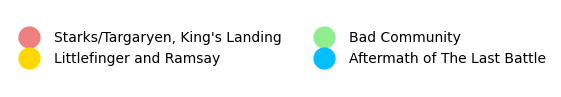

In [74]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen, King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Aftermath of The Last Battle")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

### Comparison

In [75]:
community_methods =[]
community_methods.append("Infomap")
community_methods.append("Louvain")
community_methods.append("Girvan-Newmann")
community_methods.append("Greedy M.M.")
community_methods.append("Spectral Clustering")

methods_modularity = []
methods_modularity.append(modularity_infomap)
methods_modularity.append(modularity_louvain)
methods_modularity.append(modularity_g_n)
methods_modularity.append(modularity_gmm)
methods_modularity.append(modularity_sc)

n_communities = []
n_communities.append(n_comm_infomap)
n_communities.append(n_comm_louvain)
n_communities.append(n_comm_g_n)
n_communities.append(n_comm_gmm)
n_communities.append(n_comm_sc)

print("Comparison between Methods: Number of Communities and Modularity")
print(f"Infomap: {n_communities[0]}  -  {methods_modularity[0]}")
print(f"Louvain: {n_communities[1]}  -  {methods_modularity[1]}")
print(f"Girvan-Newman: {n_communities[2]}  -  {methods_modularity[2]}")
print(f"Greedy Modularity Maximization: {n_communities[3]}  -  {methods_modularity[3]}")
print(f"Spectral Clustring: {n_communities[4]}  -  {methods_modularity[4]}")

Comparison between Methods: Number of Communities and Modularity
Infomap: 4  -  0.031
Louvain: 5  -  0.201
Girvan-Newman: 4  -  0.021
Greedy Modularity Maximization: 6  -  0.175
Spectral Clustring: 4  -  0.021


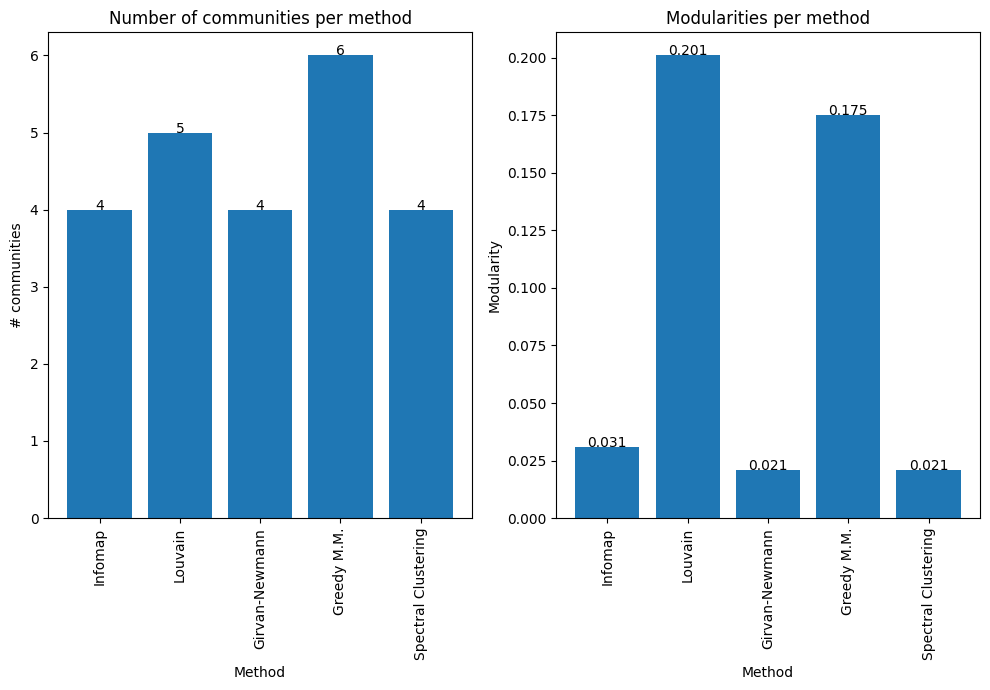

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Number of communities per method
axs[0].bar(community_methods, n_communities)
for i, v in enumerate(n_communities):
    axs[0].text(i, v, str(v), ha='center', color='black')
axs[0].set_xlabel("Method")
axs[0].set_ylabel("# communities")
axs[0].set_title("Number of communities per method")
axs[0].set_xticks(range(len(community_methods)))
axs[0].set_xticklabels(community_methods, rotation='vertical')

# Modularities per method
axs[1].bar(community_methods, methods_modularity)
for i, v in enumerate(methods_modularity):
    axs[1].text(i, v, str(v), ha='center', color='black')
axs[1].set_xlabel("Method")
axs[1].set_ylabel("Modularity")
axs[1].set_title("Modularities per method")
axs[1].set_xticks(range(len(community_methods)))
axs[1].set_xticklabels(community_methods, rotation='vertical')

plt.tight_layout()
plt.show()

## Robustness

### Random Nodes Removal

In [77]:
import random
import numpy as np
import networkx as nx

random_seed = 30
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(list(graph_copy.nodes()), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]

    # Compute all the new metrics
    betweenness_centrality = nx.betweenness_centrality(new_graph)
    closeness_centrality = nx.closeness_centrality(new_graph)
    harmonic_centrality = nx.harmonic_centrality(new_graph)
    degree_centrality = nx.degree_centrality(new_graph)

    try:
        eigenvector_centrality = nx.eigenvector_centrality(new_graph)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {node: float('nan') for node in new_graph.nodes()}

    # Five most central nodes
    first5_bcen = list(dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]

    # Mean centrality
    mean_bcen = np.mean(list(betweenness_centrality.values()))
    mean_ccen = np.mean(list(closeness_centrality.values()))
    mean_ecen = np.mean(list(eigenvector_centrality.values()))
    mean_charm = np.mean(list(harmonic_centrality.values()))
    mean_cdegree = np.mean(list(degree_centrality.values()))

    # Metric about the giant component
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = new_graph.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)
    d = nx.diameter(giant_component)

    # Dictionary
    random_res[i] = {
        'average shortest path': avg_shortest_path,
        'diameter': d,
        '5 most central nodes - betweenness centrality': first5_bcen,
        '5 most central nodes - closeness centrality': first5_ccen,
        '5 most central nodes - eigenvector centrality': first5_ecen,
        '5 most central nodes - harmonic centrality': first5_charm,
        '5 most central nodes - degree centrality': first5_cdegree,
        'Mean betweenness centrality': mean_bcen,
        'Mean closeness centrality': mean_ccen,
        'Mean eigenvector centrality': mean_ecen,
        'Mean harmonic centrality': mean_charm,
        'Mean degree centrality': mean_cdegree,
        'number of components': len(components)
    }
    graphs.append(new_graph)

# Output the results
for k, v in random_res.items():
    print(f"Nodes removed: {k}")
    for metric, value in v.items():
        print(f"{metric}: {value}")
    print("\n")


Nodes removed: 5
average shortest path: 1.9490384615384615
diameter: 5
5 most central nodes - betweenness centrality: ['DAENERYS', 'SAM', 'ARYA', 'SANSA', 'JON']
5 most central nodes - closeness centrality: ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'DAVOS']
5 most central nodes - eigenvector centrality: ['SAM', 'TYRION', 'SANSA', 'GREY_WORM', 'DAVOS']
5 most central nodes - harmonic centrality: ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA']
5 most central nodes - degree centrality: ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA']
Mean betweenness centrality: 0.012558689926327441
Mean closeness centrality: 0.47245472438781744
Mean eigenvector centrality: 0.09256796830597058
Mean harmonic centrality: 35.70241545893719
Mean degree centrality: 0.2173913043478261
number of components: 4


Nodes removed: 10
average shortest path: 2.0733766233766233
diameter: 5
5 most central nodes - betweenness centrality: ['JON', 'BRONN', 'ARYA', 'TYRION', 'VARYS']
5 most central nodes - closeness centrality: ['

In [78]:
for i in n_sample_to_remove:
  print(random_res[i])

{'average shortest path': 1.9490384615384615, 'diameter': 5, '5 most central nodes - betweenness centrality': ['DAENERYS', 'SAM', 'ARYA', 'SANSA', 'JON'], '5 most central nodes - closeness centrality': ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'DAVOS'], '5 most central nodes - eigenvector centrality': ['SAM', 'TYRION', 'SANSA', 'GREY_WORM', 'DAVOS'], '5 most central nodes - harmonic centrality': ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA'], '5 most central nodes - degree centrality': ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA'], 'Mean betweenness centrality': 0.012558689926327441, 'Mean closeness centrality': 0.47245472438781744, 'Mean eigenvector centrality': 0.09256796830597058, 'Mean harmonic centrality': 35.70241545893719, 'Mean degree centrality': 0.2173913043478261, 'number of components': 4}
{'average shortest path': 2.0733766233766233, 'diameter': 5, '5 most central nodes - betweenness centrality': ['JON', 'BRONN', 'ARYA', 'TYRION', 'VARYS'], '5 most central nodes - closeness 

In [79]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

Isolated nodes in the network:  0 is [{'LITTLEFINGER', 'RAMSAY'}, {'ALTON'}, {'WILLIAM'}]
Isolated nodes in the network:  1 is [{'RANDYLL', 'DICKON'}, {'LITTLEFINGER', 'RAMSAY'}, {'VISERYS'}, {'MARWYN'}, {'AEGON'}, {'ALTON'}]
Isolated nodes in the network:  2 is [{'LITTLEFINGER', 'RAMSAY'}, {'ALANNA'}]
Isolated nodes in the network:  3 is [{'ALANNA', 'OWEN'}, {'LITTLEFINGER', 'RAMSAY'}, {'UNSULLIED_CAPTAIN'}, {'WILLIAM'}]
Isolated nodes in the network:  4 is [{'LITTLEFINGER', 'RAMSAY'}, {'CATELYN'}]
Isolated nodes in the network:  5 is [{'ALANNA'}, {'WILLIAM'}, {'RAMSAY'}]
Isolated nodes in the network:  6 is [{'LITTLEFINGER', 'RAMSAY'}, {'OWEN'}, {'AEGON'}, {'WILLIAM'}]


In [80]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness"][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)

    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [81]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)

Isolated nodes in the first network:  [{'LITTLEFINGER', 'RAMSAY'}, {'VISERYS'}, {'AEGON'}]
Isolated nodes in the second network:  [{'ALANNA', 'OWEN'}, {'RANDYLL', 'DICKON'}, {'LITTLEFINGER', 'RAMSAY'}, {'VISERYS'}, {'MARWYN'}, {'AEGON'}]
Isolated nodes in the third network:  [{'ALANNA', 'OWEN'}, {'RANDYLL', 'DICKON'}, {'LITTLEFINGER', 'RAMSAY'}, {'VISERYS'}, {'MARWYN'}, {'AEGON'}]


### Preferential Attachment - Link Prediction

In [82]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

First node Second node  Score
1203     GENDRY       VARYS    930
141       HOUND        BRAN    768
1615        SAM      CERSEI    756
1214     GENDRY   MISSANDEI    750
140       HOUND       VARYS    744
...         ...         ...    ...
205     WILLIAM      MARWYN      1
320       ALTON     CATELYN      1
1385     ALANNA      MARWYN      1
2116    VISERYS      MARTHA      1
327       ALTON       AEGON      1

[2148 rows x 3 columns]

### Node Prediction

In [83]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=30, initial_graph=G)

In [84]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
553  LITTLEFINGER          74      2

In [85]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=30, initial_graph=G)

In [86]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
116          TYRION          74    420
267           DAVOS          74    380
76              JON          74    370
176         BRIENNE          74    350
388            BRAN          74    330
513      YOHN_ROYCE          74    300
439         TORMUND          74    300
528  MAESTER_WOLKAN          74    260
463           EURON          74    130
562    LITTLEFINGER          74     20

In [87]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=30, initial_graph=G)

In [88]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

First node Second node  Score
389           SAM          76    784
257         SANSA          75    736
258         SANSA          76    736
473     GREY_WORM          75    720
474     GREY_WORM          76    720
..            ...         ...    ...
571          NORA          75     64
639         MAREI          74     60
648       JOFFREY          77     56
685       CATELYN          75     32
687  LITTLEFINGER          74     30

[140 rows x 3 columns]

In [89]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

First node
JON                8
SAM                7
GREY_WORM          7
SANSA              6
VALE_LORD          6
ARYA               5
BERIC              5
MISSANDEI          5
DAENERYS           4
DAVOS              4
IRONBORN_LORD      4
VARYS              4
PODRICK            4
MAESTER_WOLKAN     3
ROBERT             3
ALYS               3
YOHN_ROYCE         3
WILLA              3
TORMUND            3
EDDISON_TOLLETT    3
JAIME              3
BRIENNE            3
MELISANDRE         2
SARRA              2
EURON              2
75                 2
76                 2
TYWIN              2
DORNISH_PRINCE     2
ROBIN              2
GENDRY             2
BRAN               2
JORAH              2
RIVERLANDS_LORD    2
YARA               1
CATELYN            1
JOFFREY            1
MAREI              1
NORA               1
TYRION             1
RHAEGAR            1
HARRY              1
CRAYAH             1
LYANNA             1
MOUNTAIN           1
THEON              1
QYBURN             1
BRONN              1
74                 1
HOUND              1
GILLY              1
QHONO              1
LYANNA_MORMONT     1
LITTLEFINGER       1
Name: count, dtype: int64

In [90]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

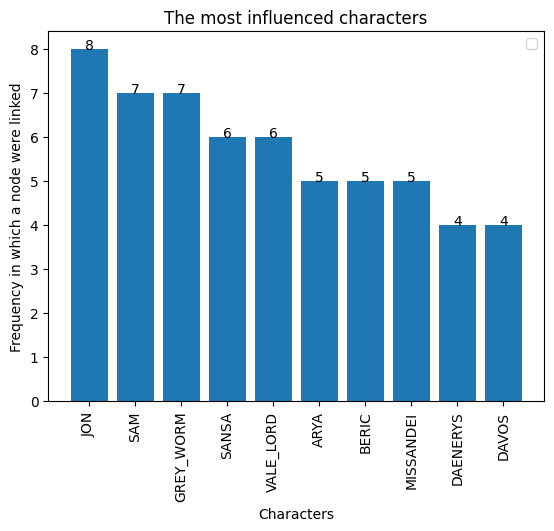

In [91]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()